<a href="https://colab.research.google.com/github/marek-02/AI/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratoria 3 - Metoda wektorów wspierających
## Marek Żuwała, Bartosz Pawłowski

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

from math import sqrt

In [ ]:
flame = pd.read_csv('flame.txt', delimiter='\t', header=None)
jain = pd.read_csv('jain.txt', delimiter='\t', header=None)

datasets = [flame, jain]

In [ ]:
names = []
classifiers = []

In [ ]:
names.append("Liniowy SVM")
classifiers.append(make_pipeline(StandardScaler(), SVC(kernel="linear", C=0.025, gamma='auto')))

In [ ]:
def incomplete_dot_product(X, Y):
    if Y is None:
        Y = X

    res = []
    for i, x in enumerate(X):
        res.append([])
        for y in Y:
            res[i].append(x[0] * y[0])

    return np.array(res)

In [ ]:
names.append("Kernel niepełny iloczyn skalarny")
classifiers.append(make_pipeline(StandardScaler(), SVC(kernel=incomplete_dot_product, C=0.025, gamma='auto')))

In [ ]:
names.append("Kernel gaussowski RBF")
classifiers.append(make_pipeline(StandardScaler(), SVC(kernel="rbf", C=0.025, gamma='auto')))

In [ ]:
def jump_kernel(X, Y):
    if Y is None:
        Y = X

    R = 1
    res = []

    for i, x in enumerate(X):
        res.append([])
        for y in Y:
            res[i].append(1 if np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) <= R else 0)

    return np.array(res)

In [ ]:
names.append("Kernel skokowy")
classifiers.append(make_pipeline(StandardScaler(), SVC(kernel=jump_kernel, C=0.025, gamma='auto')))

In [ ]:
def hinge(X, Y):
    if Y is None:
        Y = X

    R = 1
    res = []

    for i, x in enumerate(X):
        res.append([])
        for y in Y:
            k = np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)
            res[i].append(1 - k / R if k <= R else 0)

    return res

In [ ]:
names.append("Kernel funkcja zawiasowa")
classifiers.append(make_pipeline(StandardScaler(), SVC(kernel=hinge, C=0.025, gamma='auto')))

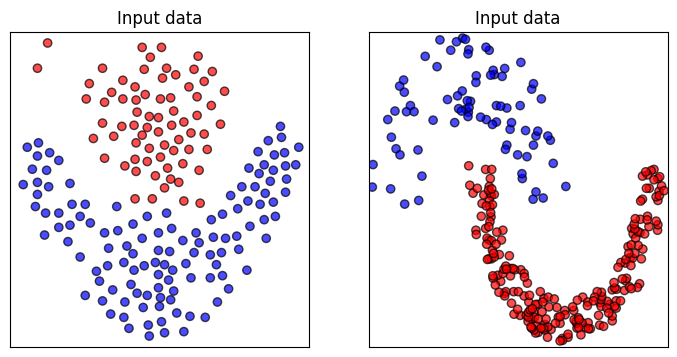

In [ ]:
i = 1
figure = plt.figure(figsize=(27, 9))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds.iloc[:, 0:2], ds.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    x_min, x_max = X[:][0].min() - 0.5, X[:][0].max() + 0.5
    y_min, y_max = X[:][1].min() - 0.5, X[:][1].max() + 0.5

    x, y = X_train.iloc[:, 0], X_train.iloc[:, 1]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.set_title("Input data")
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1

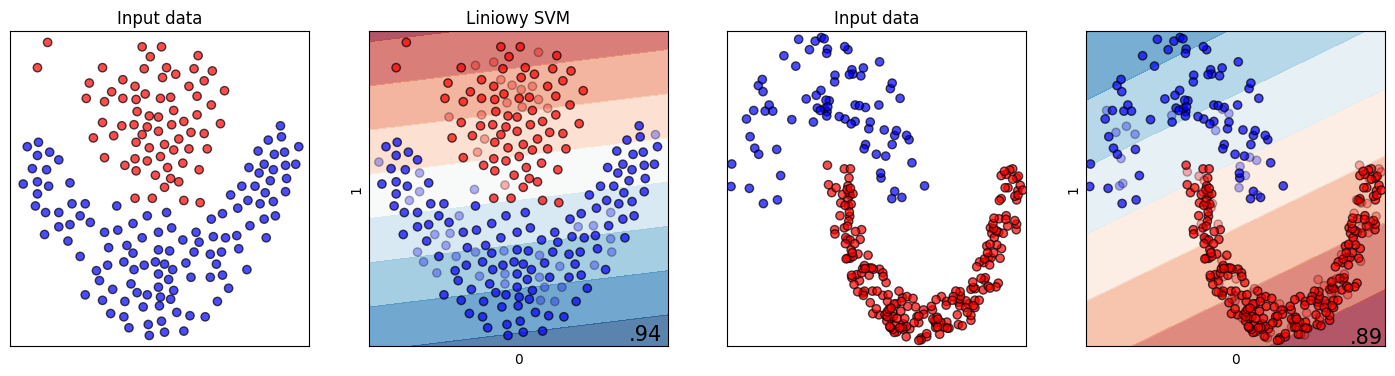

In [ ]:
i = 1
figure = plt.figure(figsize=(27, 9))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds.iloc[:, 0:2], ds.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    x_min, x_max = X[:][0].min() - 0.5, X[:][0].max() + 0.5
    y_min, y_max = X[:][1].min() - 0.5, X[:][1].max() + 0.5

    x, y = X_train.iloc[:, 0], X_train.iloc[:, 1]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.set_title("Input data")
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # figure = plt.figure(figsize=(81, 9))
    name, clf = names[0], classifiers[0]
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)


    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, eps=0.5, alpha=0.7, cmap=cm)

    # plot the training points
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)

    # and testing points
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    if ds_cnt == 0:
        ax.set_title(name)

    ax.text(x_max - 0.3, y_min + 0.3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1

Mimo prostej klasyfikacji za pomocą funkcji liniowej model skutecznie nauczył się wzorców w danych treningowych i dobrze zgeneralizował je do nowych danych. Satysfakcjonujący wynik score na poziomie 0.94 i 0.89. Dane na których pracowaliśmy są dość łatwe separowalne liniowo i stąd tak dobre wyniki.

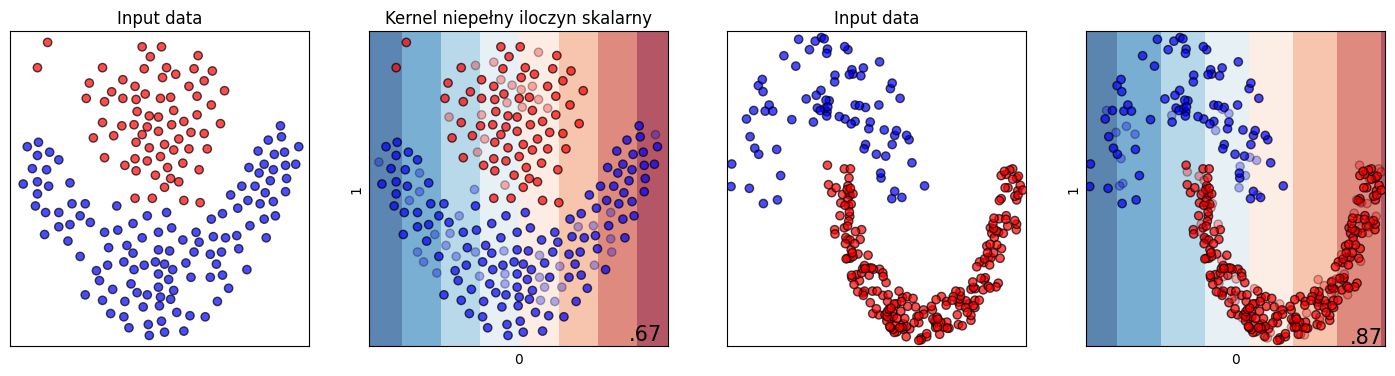

In [ ]:
i = 1
figure = plt.figure(figsize=(27, 9))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds.iloc[:, 0:2], ds.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    x_min, x_max = X[:][0].min() - 0.5, X[:][0].max() + 0.5
    y_min, y_max = X[:][1].min() - 0.5, X[:][1].max() + 0.5

    x, y = X_train.iloc[:, 0], X_train.iloc[:, 1]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.set_title("Input data")
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # figure = plt.figure(figsize=(81, 9))
    name, clf = names[1], classifiers[1]
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)


    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, eps=0.5, alpha=0.7, cmap=cm)

    # plot the training points
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)

    # and testing points
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    if ds_cnt == 0:
        ax.set_title(name)

    ax.text(x_max - 0.3, y_min + 0.3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1

W przypadku kernela typu niepełny iloczyn skalarny wyniki mocno się różnią. W pierwszym przypadku score na poziomie 0.67 to słaby wynik (ogólnie i w porównaniu z resztą klasyfikatorów). Jest tak, ponieważ zajmujemy się jedynie składową X-ową i pomijamy Y-ową. W związku z tym w pierwszym przypadku, gdzie dane są w miarę równo rozłożone po całej szerokości otrzymujemy tak słaby wynik. W drugim przypadku mamy satysfakcojnujący wynik, bo dane łatwo rozdzielić na te "lewe" i "prawe".

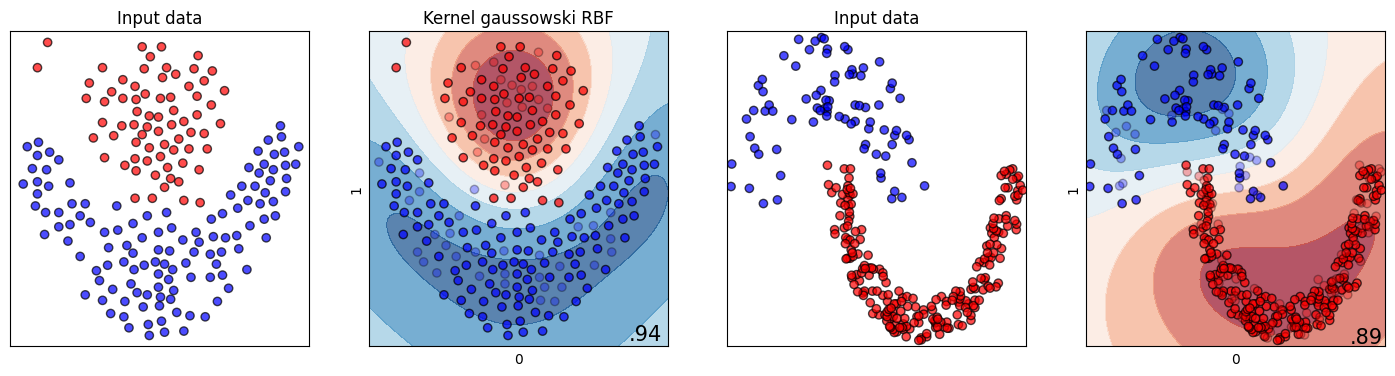

In [ ]:
i = 1
figure = plt.figure(figsize=(27, 9))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds.iloc[:, 0:2], ds.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    x_min, x_max = X[:][0].min() - 0.5, X[:][0].max() + 0.5
    y_min, y_max = X[:][1].min() - 0.5, X[:][1].max() + 0.5

    x, y = X_train.iloc[:, 0], X_train.iloc[:, 1]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.set_title("Input data")
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # figure = plt.figure(figsize=(81, 9))
    name, clf = names[2], classifiers[2]
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)


    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, eps=0.5, alpha=0.7, cmap=cm)

    # plot the training points
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)

    # and testing points
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    if ds_cnt == 0:
        ax.set_title(name)

    ax.text(x_max - 0.3, y_min + 0.3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1

Wysoki wynik w obu przypadkach. Wizualnie widać, że dane są tak podzielone, jakbyśmy tego oczekiwali.

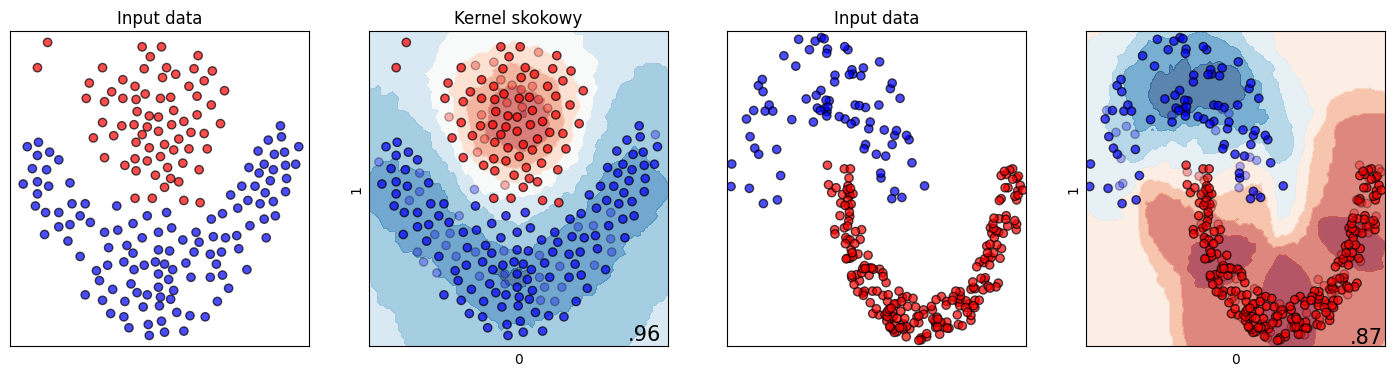

In [ ]:
i = 1
figure = plt.figure(figsize=(27, 9))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds.iloc[:, 0:2], ds.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    x_min, x_max = X[:][0].min() - 0.5, X[:][0].max() + 0.5
    y_min, y_max = X[:][1].min() - 0.5, X[:][1].max() + 0.5

    x, y = X_train.iloc[:, 0], X_train.iloc[:, 1]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.set_title("Input data")
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # figure = plt.figure(figsize=(81, 9))
    name, clf = names[3], classifiers[3]
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)


    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, eps=0.5, alpha=0.7, cmap=cm)

    # plot the training points
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)

    # and testing points
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    if ds_cnt == 0:
        ax.set_title(name)

    ax.text(x_max - 0.3, y_min + 0.3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1

Najwyższy wynik w pierwszym przypadku i wysoki wynik w drugim. Różnica w wynikach na różnych zbiorach danych może sugerować, że model może być wrażliwy na różnice w danych.

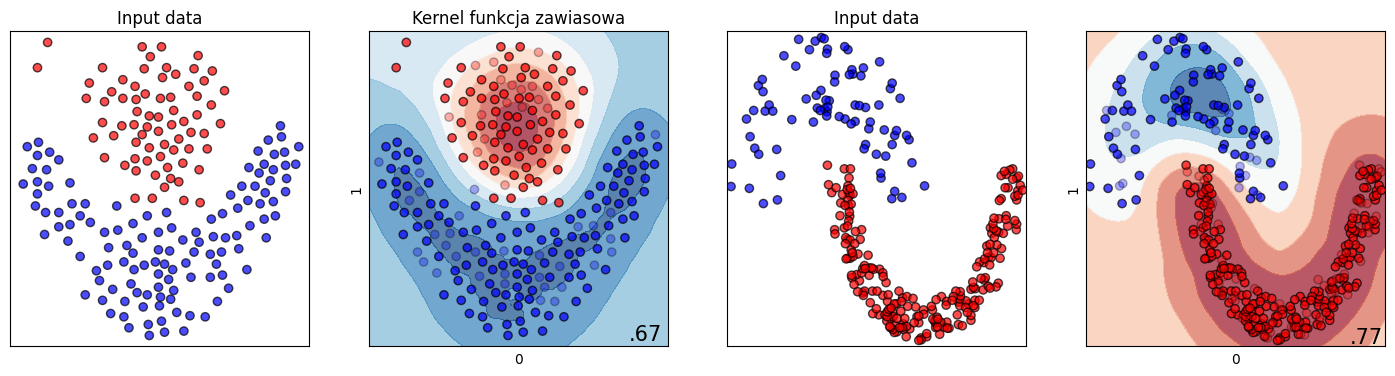

In [ ]:
i = 1
figure = plt.figure(figsize=(27, 9))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds.iloc[:, 0:2], ds.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    x_min, x_max = X[:][0].min() - 0.5, X[:][0].max() + 0.5
    y_min, y_max = X[:][1].min() - 0.5, X[:][1].max() + 0.5

    x, y = X_train.iloc[:, 0], X_train.iloc[:, 1]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.set_title("Input data")
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # figure = plt.figure(figsize=(81, 9))
    name, clf = names[4], classifiers[4]
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)


    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, eps=0.5, alpha=0.7, cmap=cm)

    # plot the training points
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)

    # and testing points
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    if ds_cnt == 0:
        ax.set_title(name)

    ax.text(x_max - 0.3, y_min + 0.3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1

Model osiąga najgorsze wyniki ze wszystkich rozpatrywanych klasyfikatorów. Wizualnie wydaje się jakby model był dopasowany ogólnie poprawnie, ale niskie wyniki score sugerują, że mogło dojść do przeuczenia.

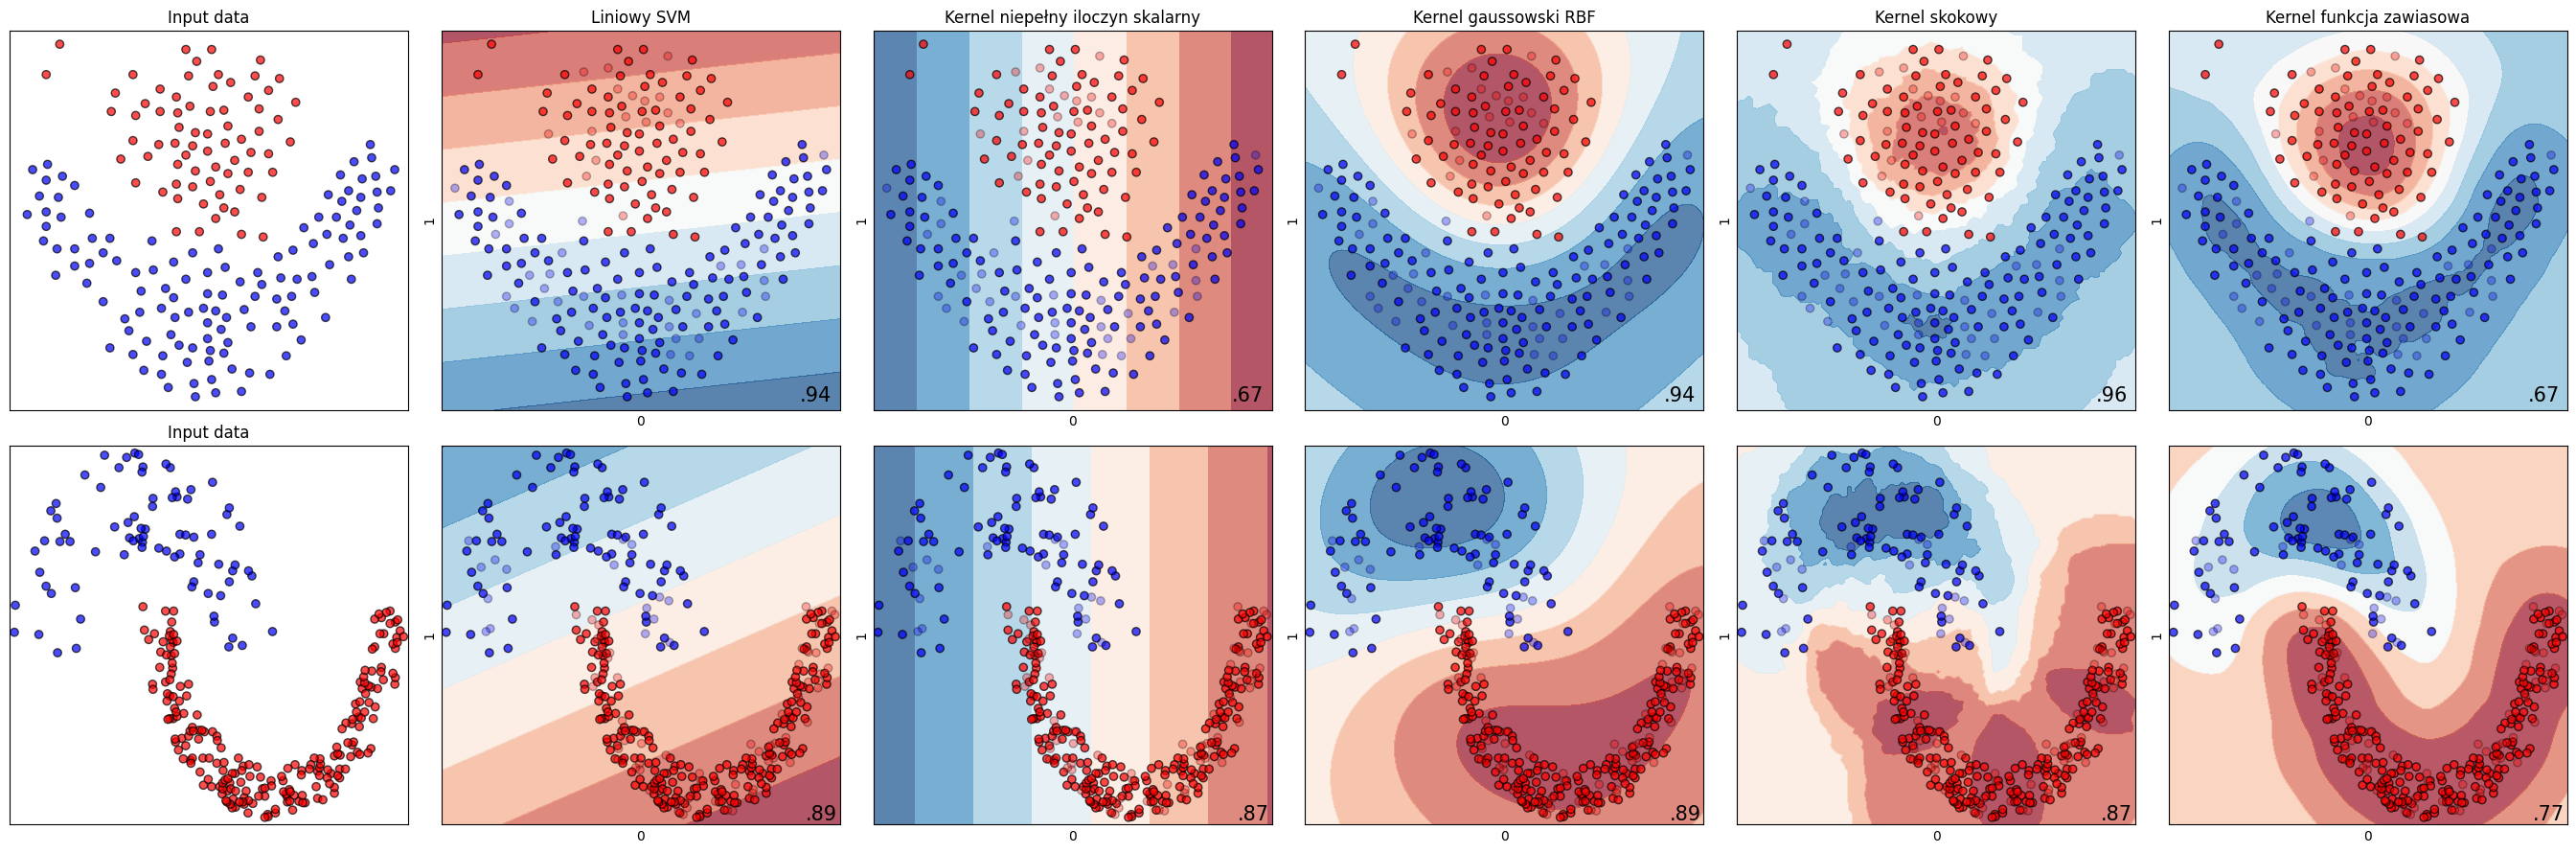

In [ ]:
figure = plt.figure(figsize=(27, 9))

i = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds.iloc[:, 0:2], ds.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    x_min, x_max = X[:][0].min() - 0.5, X[:][0].max() + 0.5
    y_min, y_max = X[:][1].min() - 0.5, X[:][1].max() + 0.5

    x, y = X_train.iloc[:, 0], X_train.iloc[:, 1]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.set_title("Input data")
    ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, eps=0.5, alpha=0.7, cmap=cm)

        # plot the training points
        ax.scatter(x, y, c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.7)

        # and testing points
        ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name)

        ax.text(x_max - 0.3, y_min + 0.3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')

        i += 1

plt.tight_layout()
plt.show()

In [ ]:
def distance_between_class_borders(clf):
    xx = np.linspace(-5, 5)
    w = clf.coef_[0]
    a = -w[0] / w[1]
    yy = a * xx - (clf.intercept_[0]) / w[1]

    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    p11 = (xx[3], yy_down[3])
    p12 = (xx[4], yy_down[4])
    p21 = (xx[3], yy_up[3])
    p22 = (xx[4], yy_up[4])

    x11, y11 = p11
    x12, y12 = p12

    a1 = round((y11 - y12) / (x11 - x12), 5)
    b1 = y11 - a1 * x11

    x21, y21 = p21
    x22, y22 = p22

    a2 = round((y21 - y22) / (x21 - x22), 5)
    b2 = y21 - a2 * x21

    return abs(b1 - b2) / sqrt(a2 * a1 + 1)


def show_results(pipeline, score, title) -> None:
    figure = plt.figure(figsize=(27, 9))
    ax = plt.subplot(1, 1, 1)

    DecisionBoundaryDisplay.from_estimator(pipeline, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5, levels=10)

    ax.scatter(X_train[:][0], X_train[:][1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.scatter(X_test[:][0], X_test[:][1], c=y_test, cmap=cm_bright, alpha=0.4, edgecolors="k")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=20, horizontalalignment="right")

    plt.tight_layout()
    plt.show()

Indices of chosen support vectors for C=0.0001: [  6  11  16  25  30  33  35  37  39  42  46  50  52  54  56  60  61  69
  75  76  77  79  81  83  86  87  92  94  96  99 100 109 118 119 126 129
 131 136 137 142 148 150 153 167 168 170 174 176 177 178 184 185 187 192
 193 195 204 211 212 219 220 221 225 228 232 233 235 237 241 242 250 259
 261 262 274 280 282 289 290 292   2   4   7  12  14  19  20  23  27  28
  29  40  41  47  48  53  55  57  59  63  64  67  78  84  88  95  98 104
 105 106 108 110 113 115 117 120 121 128 130 134 135 138 139 143 160 161
 165 180 189 190 196 198 201 203 205 207 209 214 215 223 226 234 245 247
 248 252 253 254 256 258 260 268 270 273 275 278 279 288 295 297]
Distance between class margins: 162.15882795031422


<Figure size 2700x900 with 0 Axes>

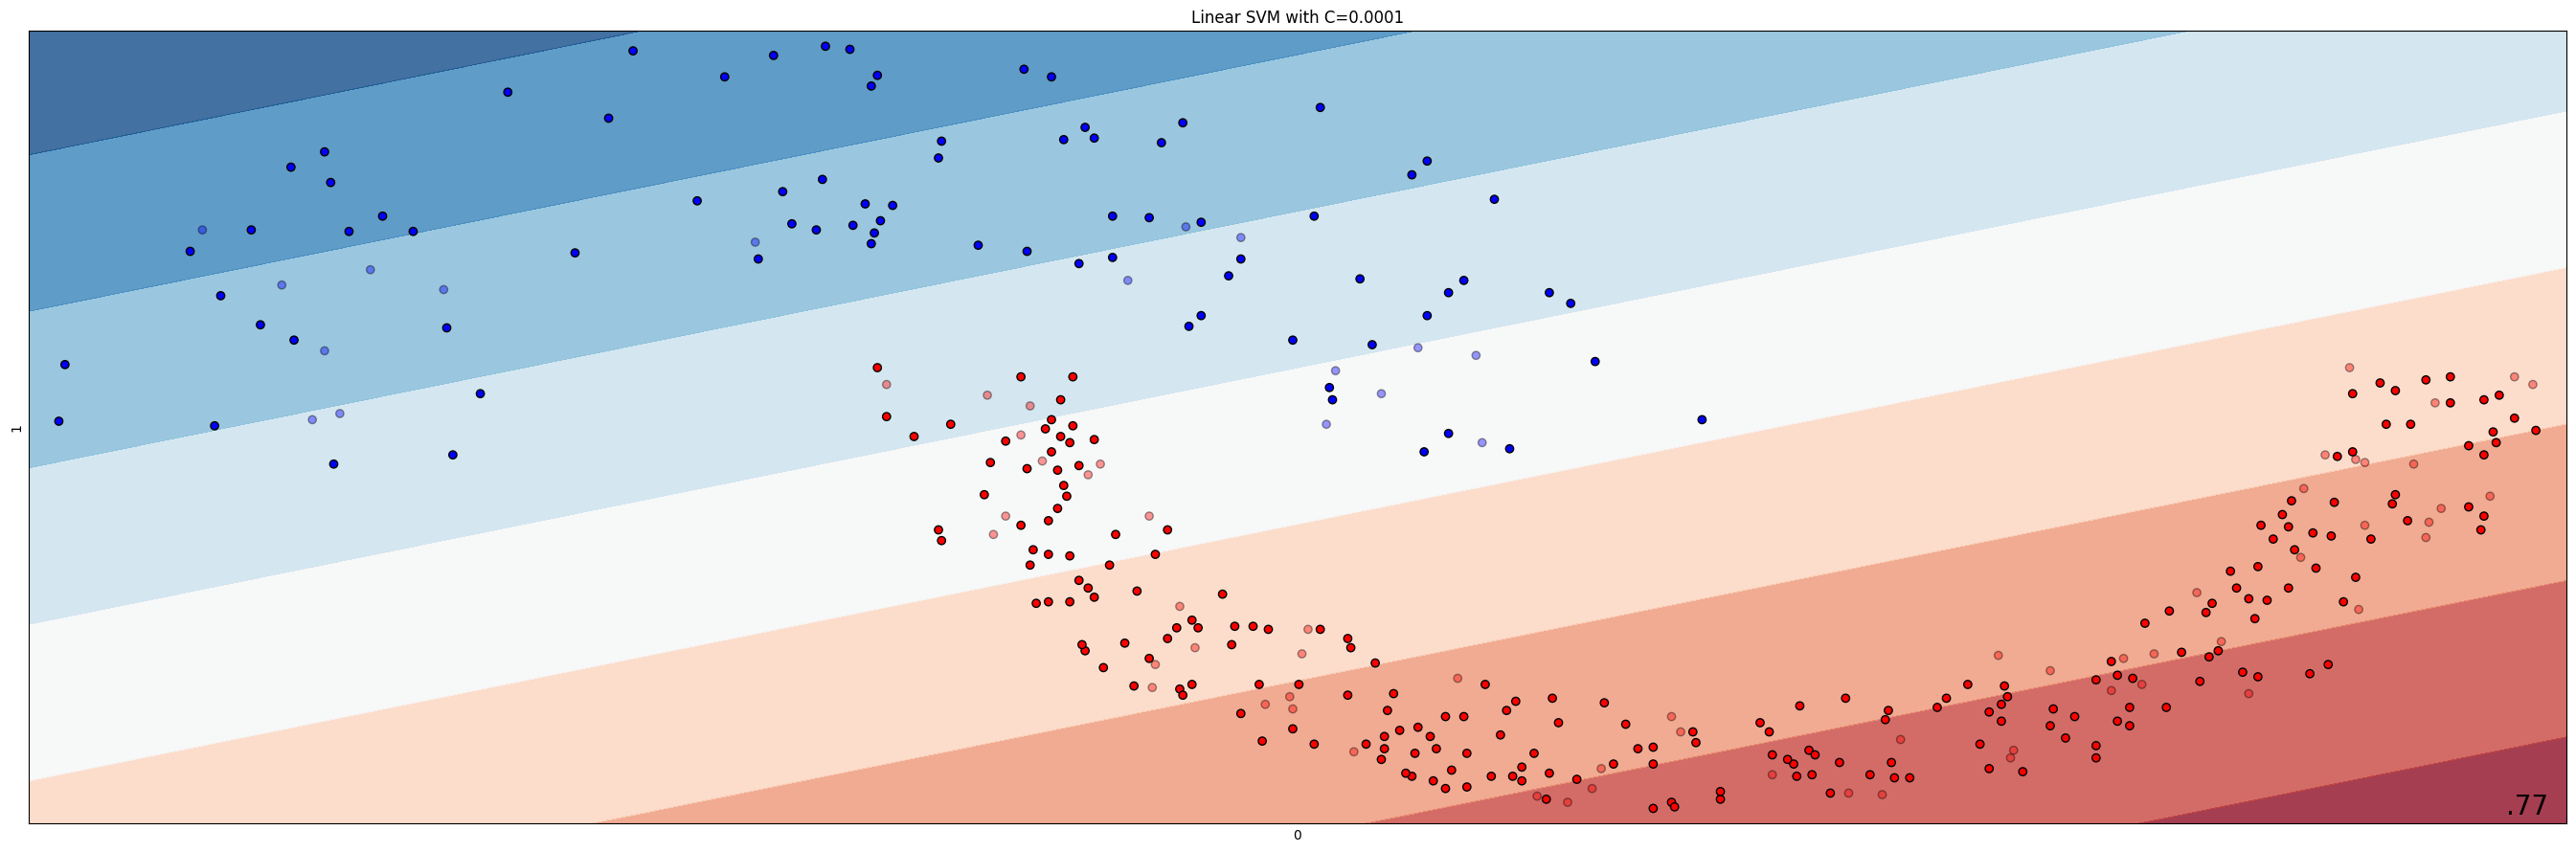

Indices of chosen support vectors for C=0.001: [  6  11  16  25  30  33  35  37  39  42  46  50  52  54  56  60  61  69
  75  76  77  79  81  83  86  87  92  94  96  99 100 109 118 119 126 129
 131 136 137 142 146 148 150 153 167 168 170 174 176 177 178 184 185 187
 192 193 195 204 211 212 219 220 221 225 228 232 233 235 237 241 242 250
 259 261 262 274 280 282 289 290 292   2   4   7  12  14  19  20  23  27
  28  29  40  41  47  48  53  55  57  59  63  64  67  78  84  88  95  98
 104 105 106 108 110 113 115 117 120 121 128 130 134 135 138 139 143 160
 161 165 180 189 190 196 198 201 203 205 207 209 214 215 223 226 234 245
 247 248 252 253 254 256 258 260 268 270 273 275 278 279 288 295 297]
Distance between class margins: 16.2163448769011


<Figure size 2700x900 with 0 Axes>

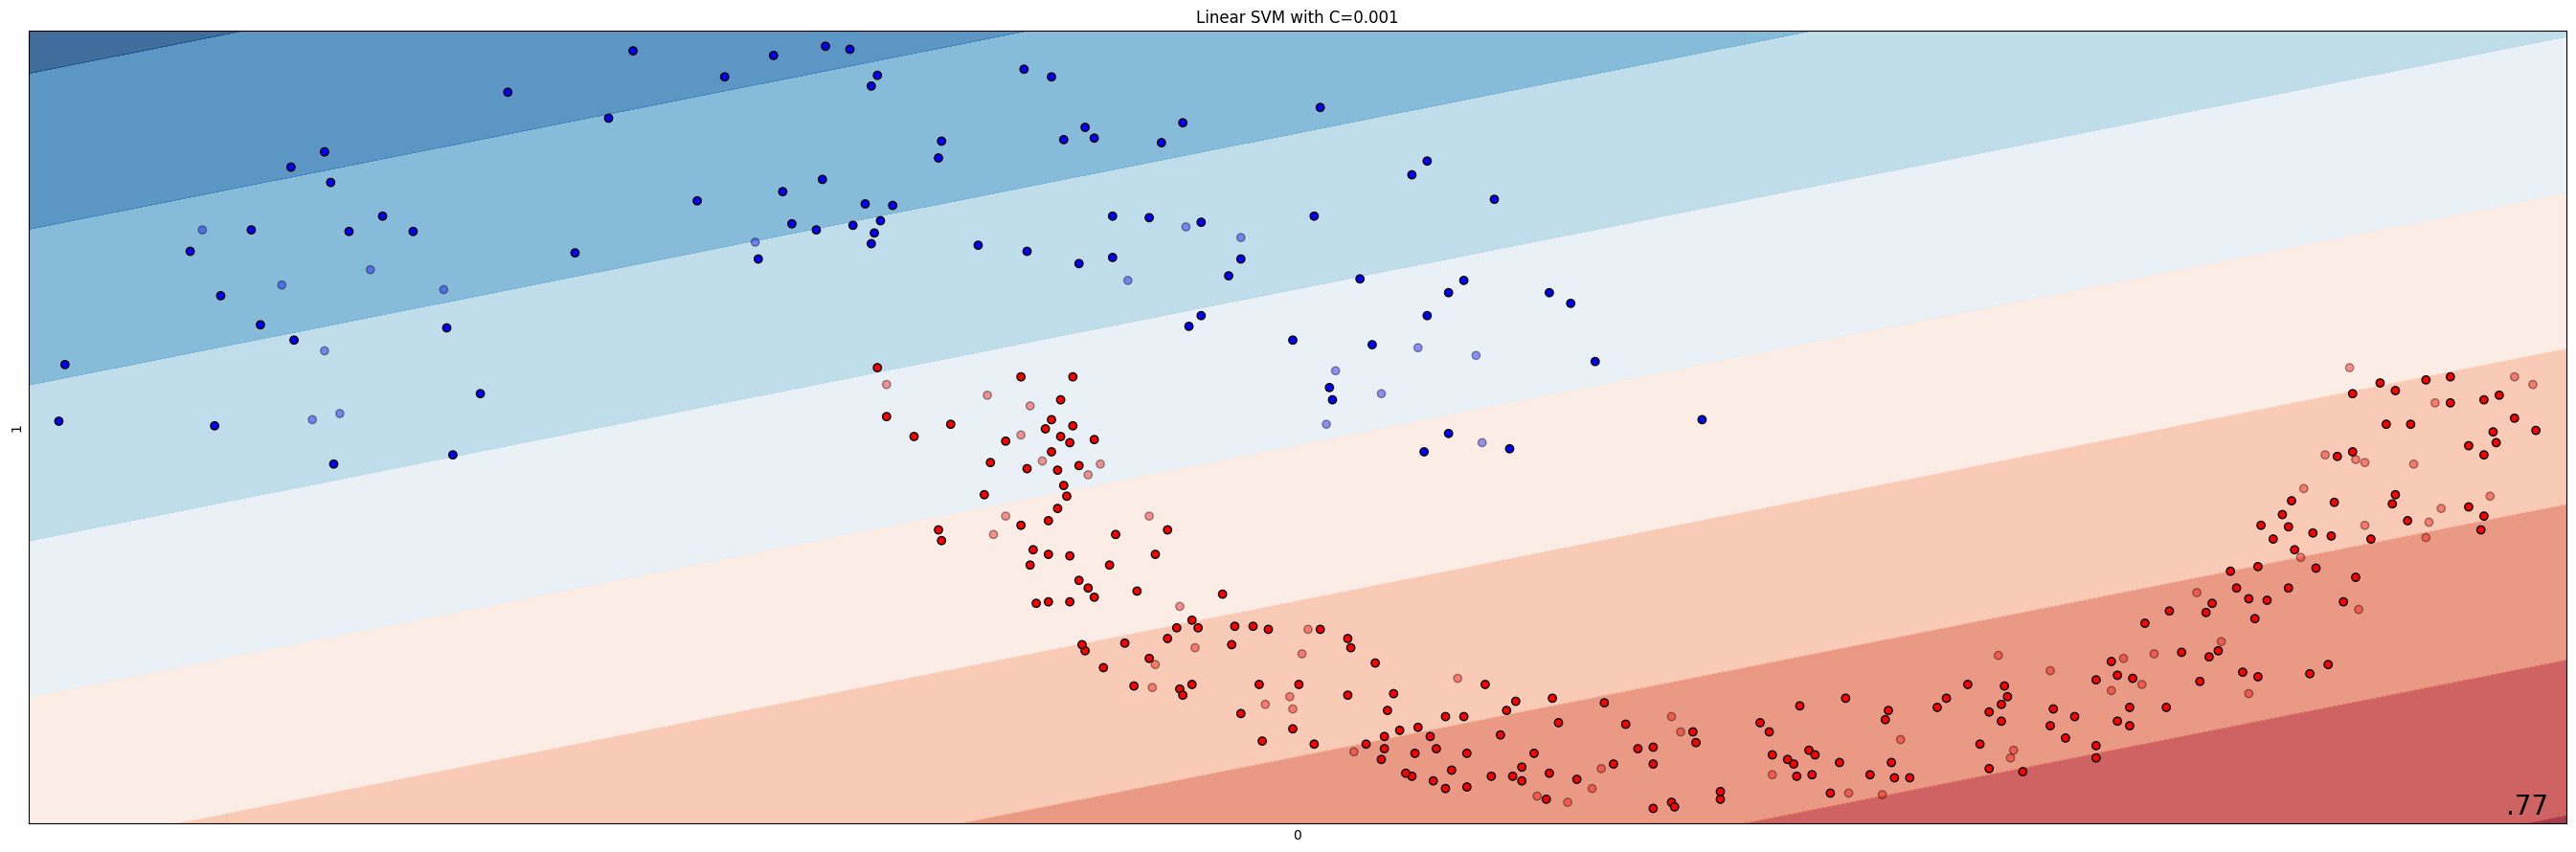

Indices of chosen support vectors for C=0.01: [  6  11  16  25  33  35  37  39  42  50  52  54  56  60  61  69  75  77
  79  81  83  86  87  92  99 100 109 118 119 126 131 136 137 142 148 150
 153 167 168 174 177 178 185 187 192 193 195 204 211 212 220 225 228 232
 235 237 241 250 259 261 262 274 280 289 290 292   4   7  12  14  19  23
  27  28  29  40  41  47  53  55  57  59  63  64  67  84  88  95  98 104
 105 106 110 117 120 121 128 130 134 135 138 160 161 165 189 190 196 198
 201 205 207 209 214 215 223 226 234 247 248 253 254 256 258 260 268 273
 275 278 279 288 295]
Distance between class margins: 2.4762425418149885


<Figure size 2700x900 with 0 Axes>

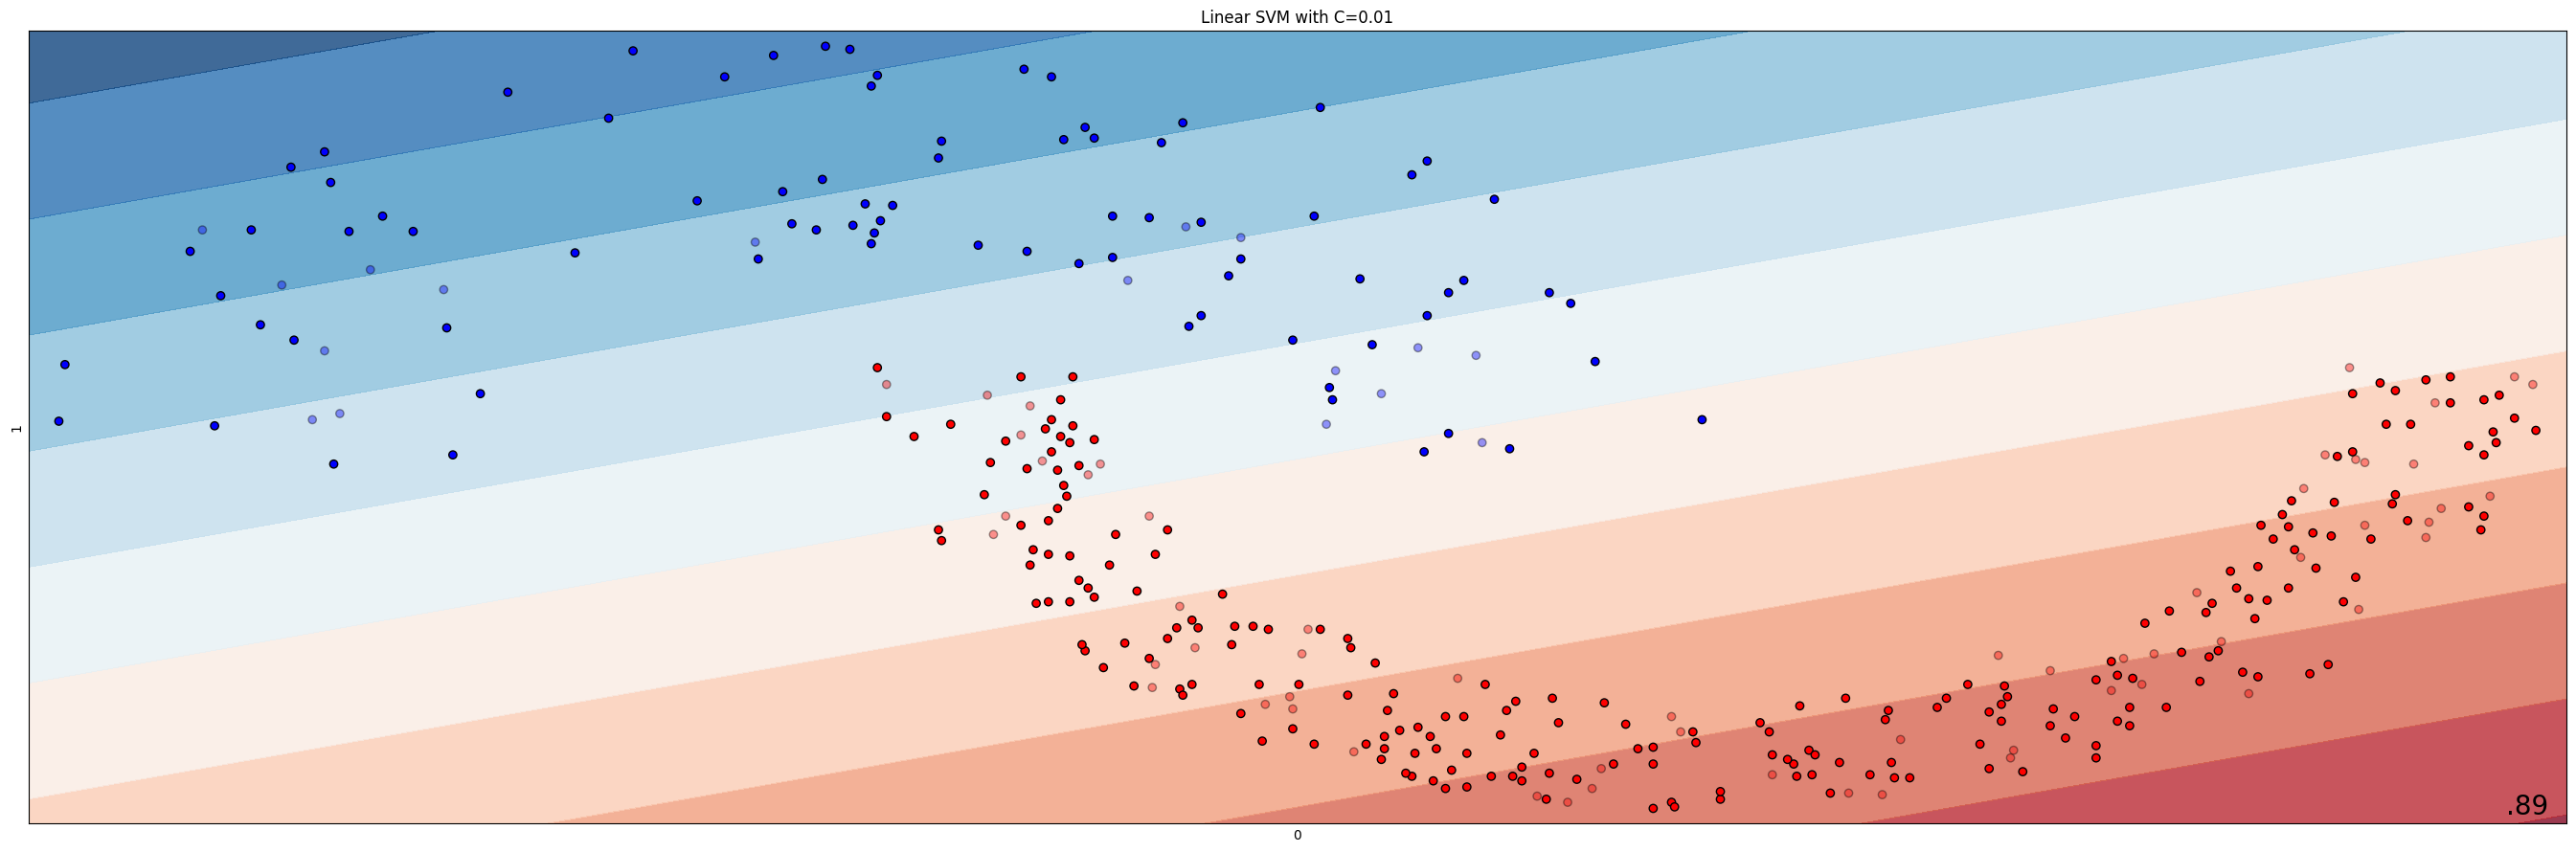

Indices of chosen support vectors for C=0.1: [  6  16  25  35  39  42  50  52  54  60  77  79  92 100 119 131 136 150
 167 168 174 178 185 187 211 237 241 250 261 262 289   7  12  19  23  28
  40  41  47  57  59  63  95 138 161 165 189 190 198 207 209 214 226 234
 248 253 256 268 273 275 278 288]
Distance between class margins: 1.3254825252600022


<Figure size 2700x900 with 0 Axes>

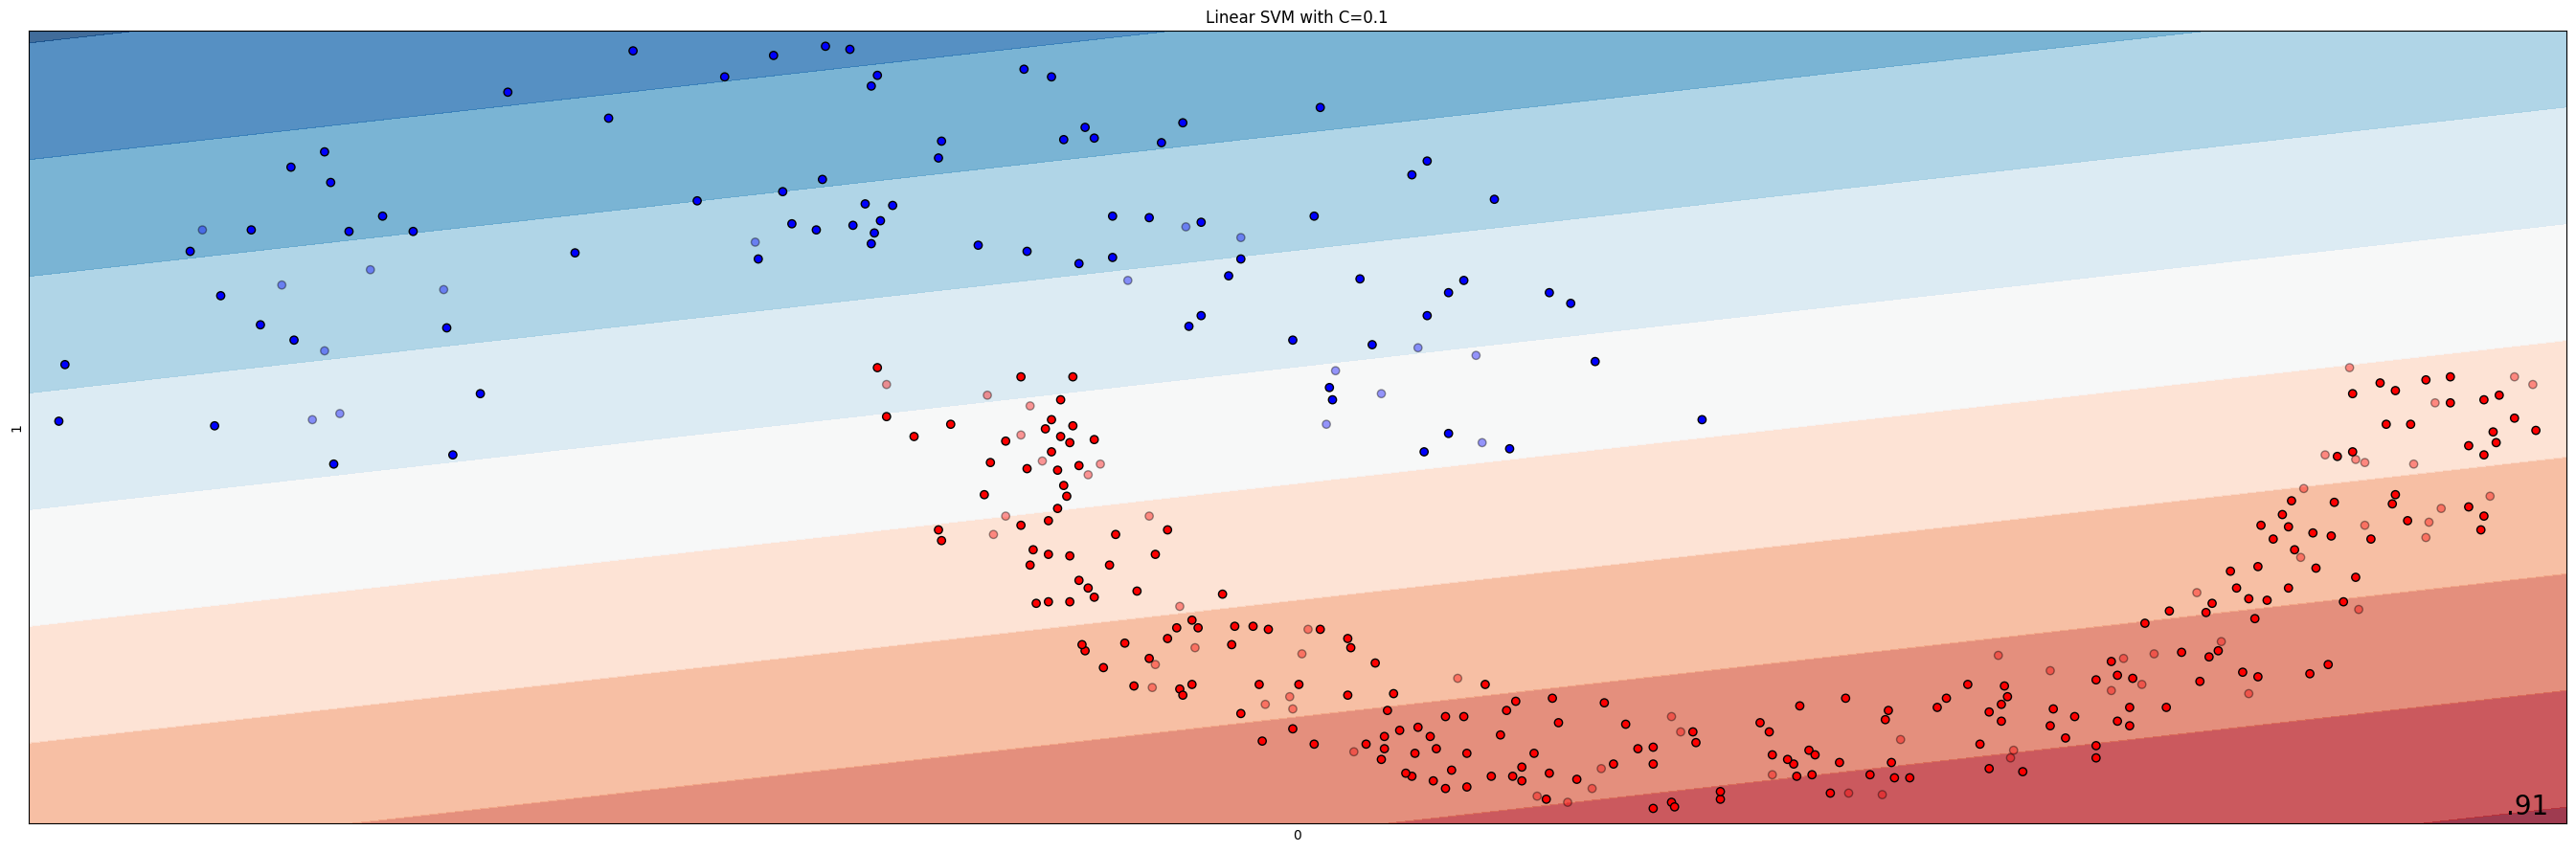

Indices of chosen support vectors for C=0.7: [  6  25  39  42  50  60  77  92 100 131 136 150 167 168 174 185 211 241
 250 261 262   7  12  23  28  40  41  47  63  95 165 190 198 209 214 226
 234 248 256 268 288]
Distance between class margins: 0.7063795329076451


<Figure size 2700x900 with 0 Axes>

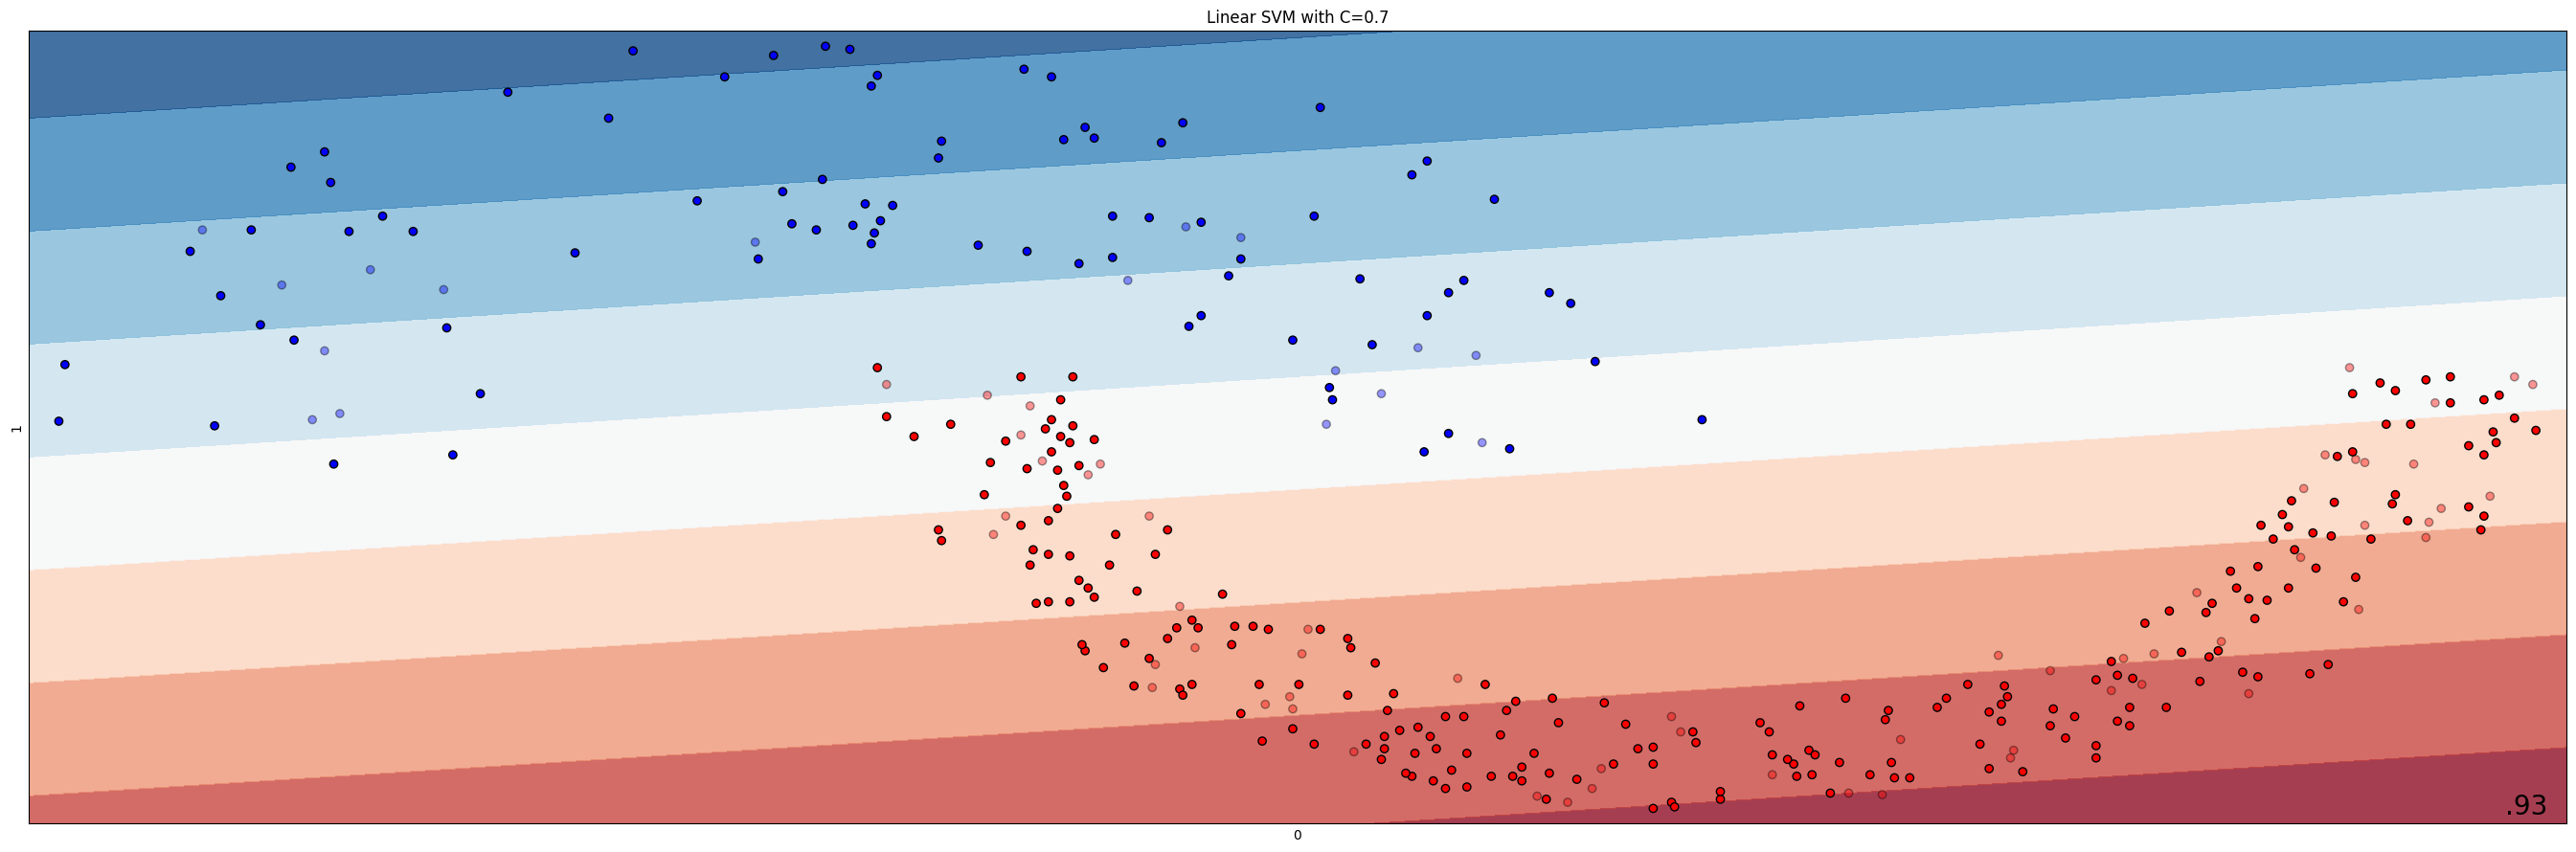

Indices of chosen support vectors for C=1: [  6  25  39  42  60  77  92 100 131 136 150 167 168 174 185 241 250 261
 262   7  12  23  40  41  47  63  95 165 190 198 209 214 226 234 248 256
 268 288]
Distance between class margins: 0.6698619750914782


<Figure size 2700x900 with 0 Axes>

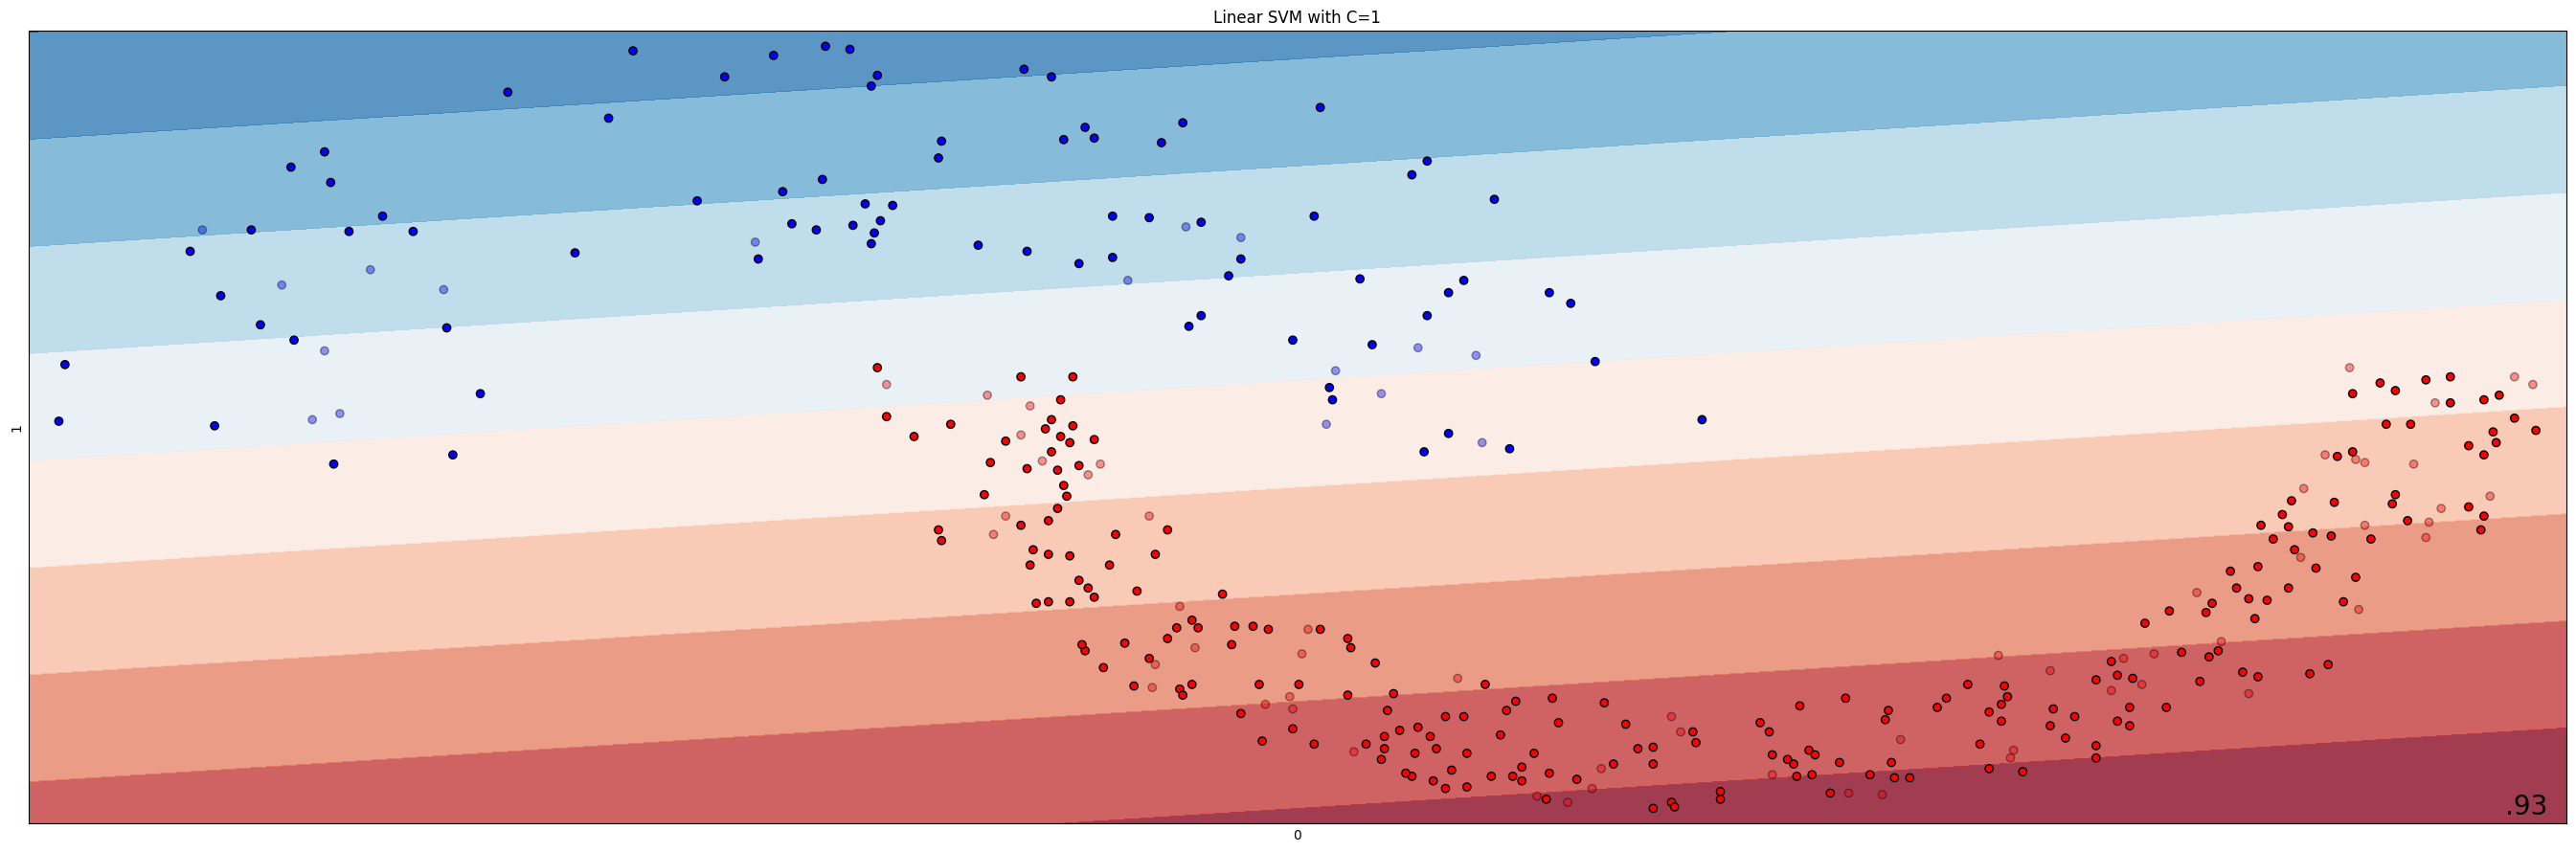

Indices of chosen support vectors for C=4: [  6  25  39  60  77  92 100 131 136 150 167 168 174 185 241 262   7  12
  23  40  47  95 165 190 198 209 214 234 248 256 268 288]
Distance between class margins: 0.5565290866045274


<Figure size 2700x900 with 0 Axes>

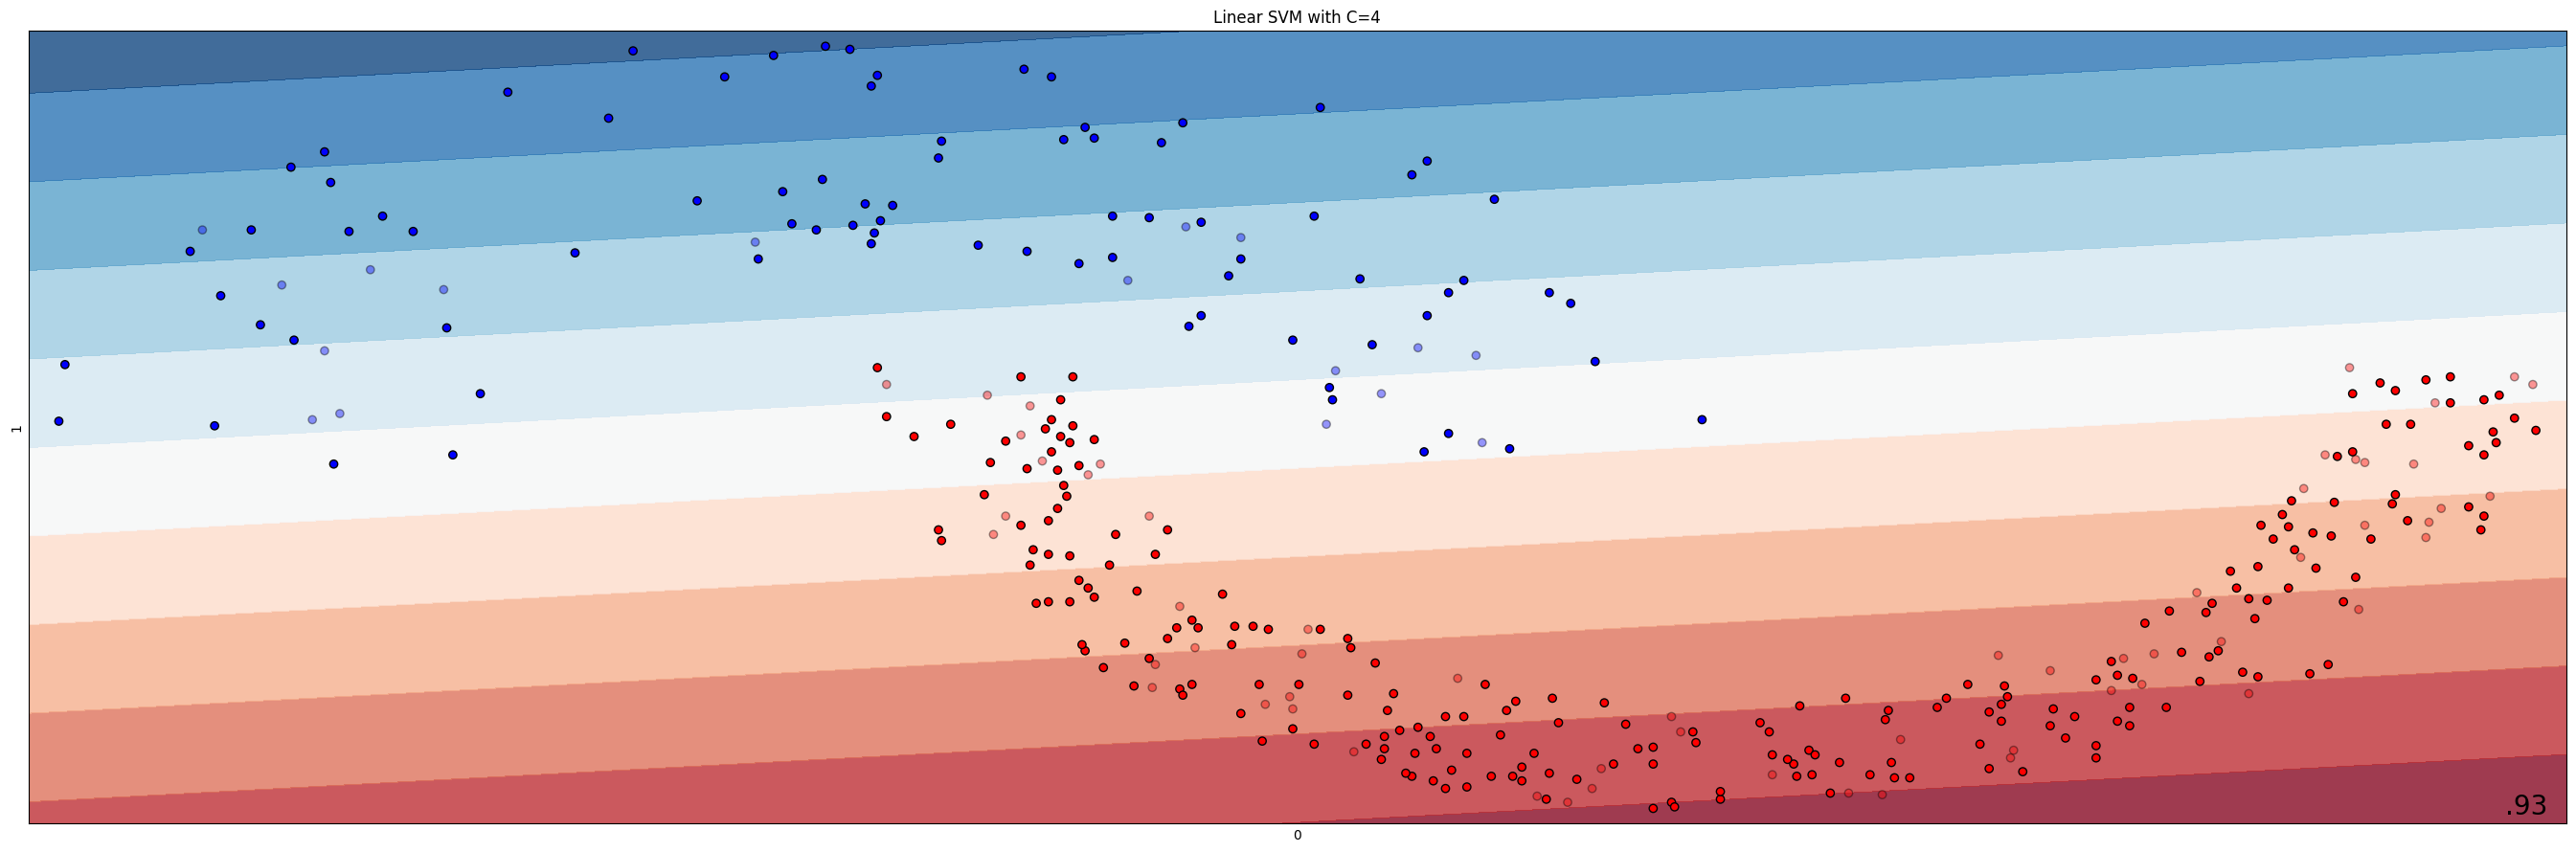

Indices of chosen support vectors for C=10: [  6  25  60  77  92 100 131 136 150 167 168 174 185 241 262   7  12  23
  40  47  95 165 190 198 209 214 234 248 256 268]
Distance between class margins: 0.5196363256138118


<Figure size 2700x900 with 0 Axes>

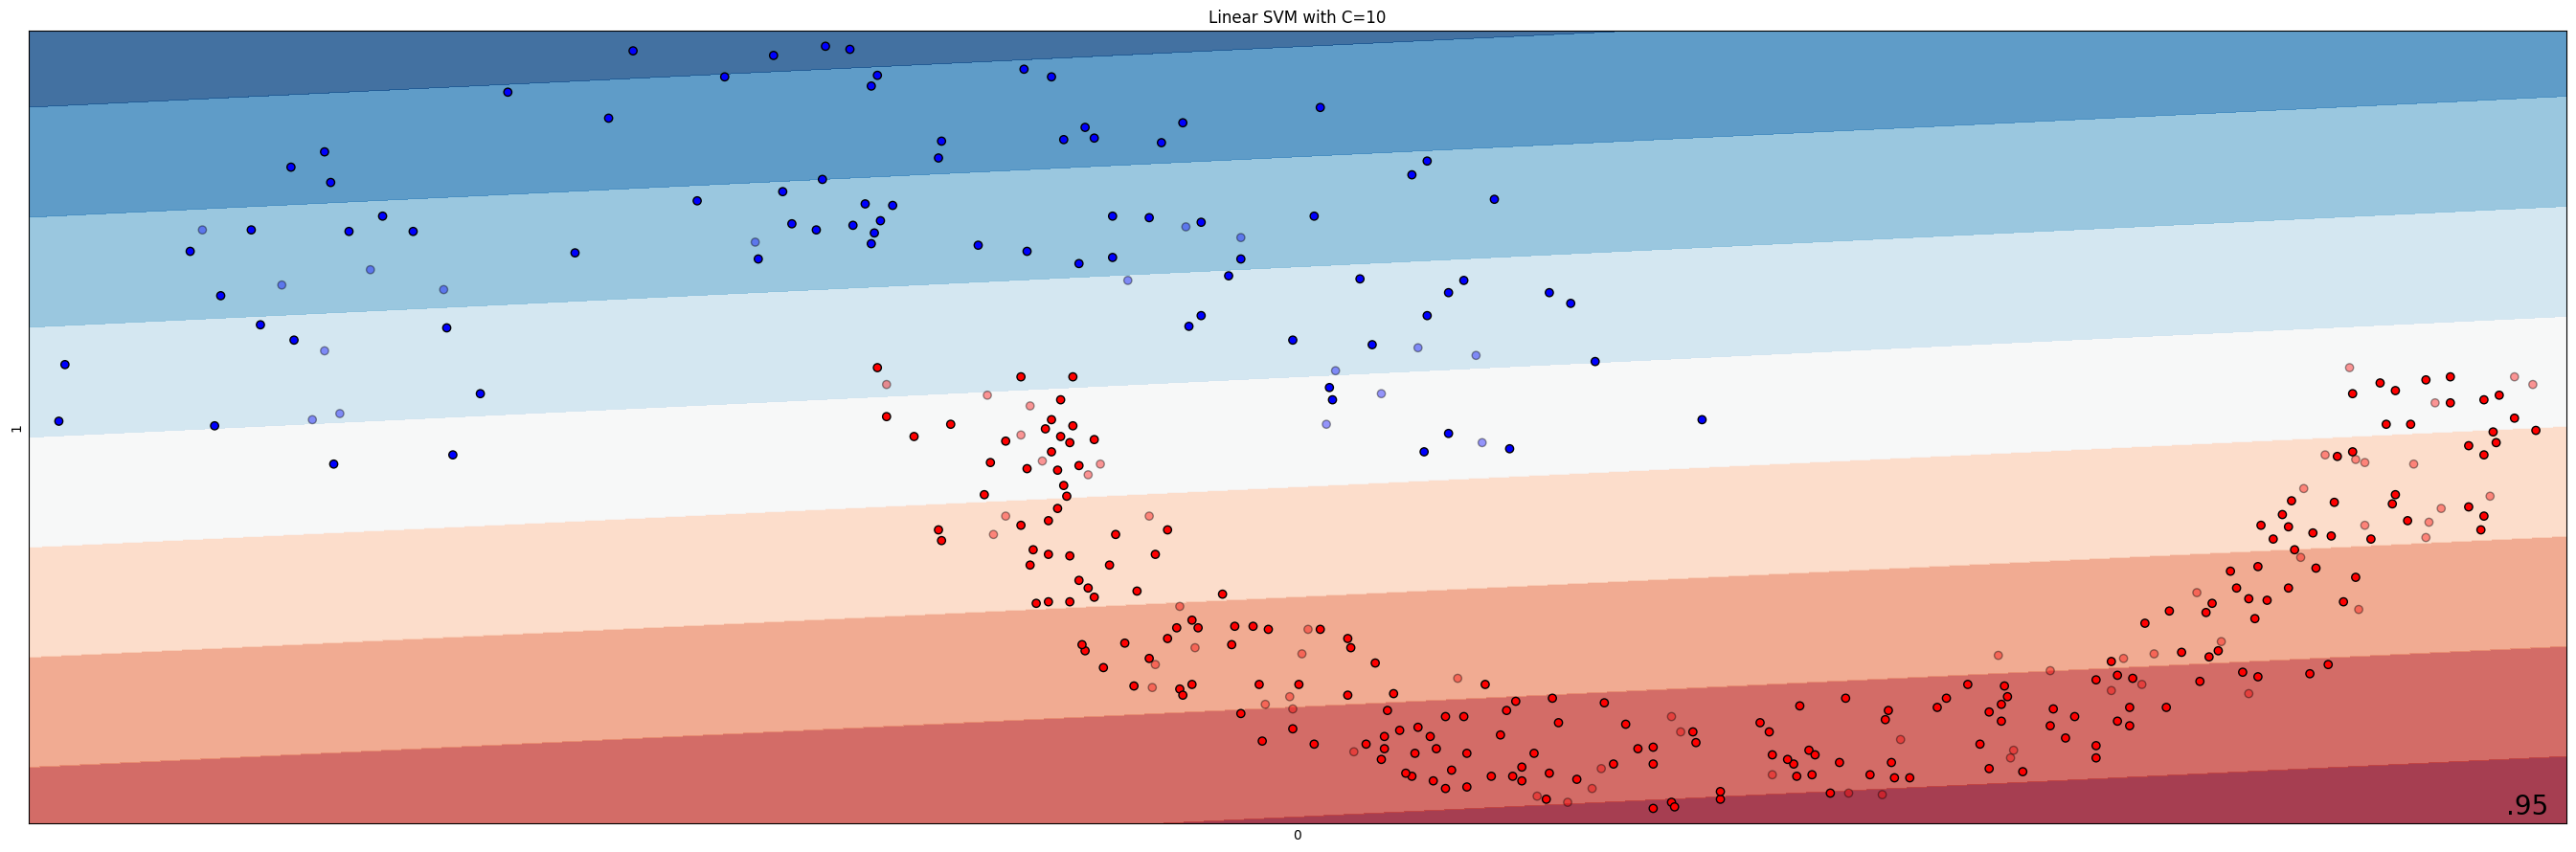

Indices of chosen support vectors for C=100: [  6  25  60  77  92 100 131 136 150 167 168 174 185 241 262   7  12  23
  40  47  95 190 198 209 214 234 248 256 268]
Distance between class margins: 0.43392438995549354


<Figure size 2700x900 with 0 Axes>

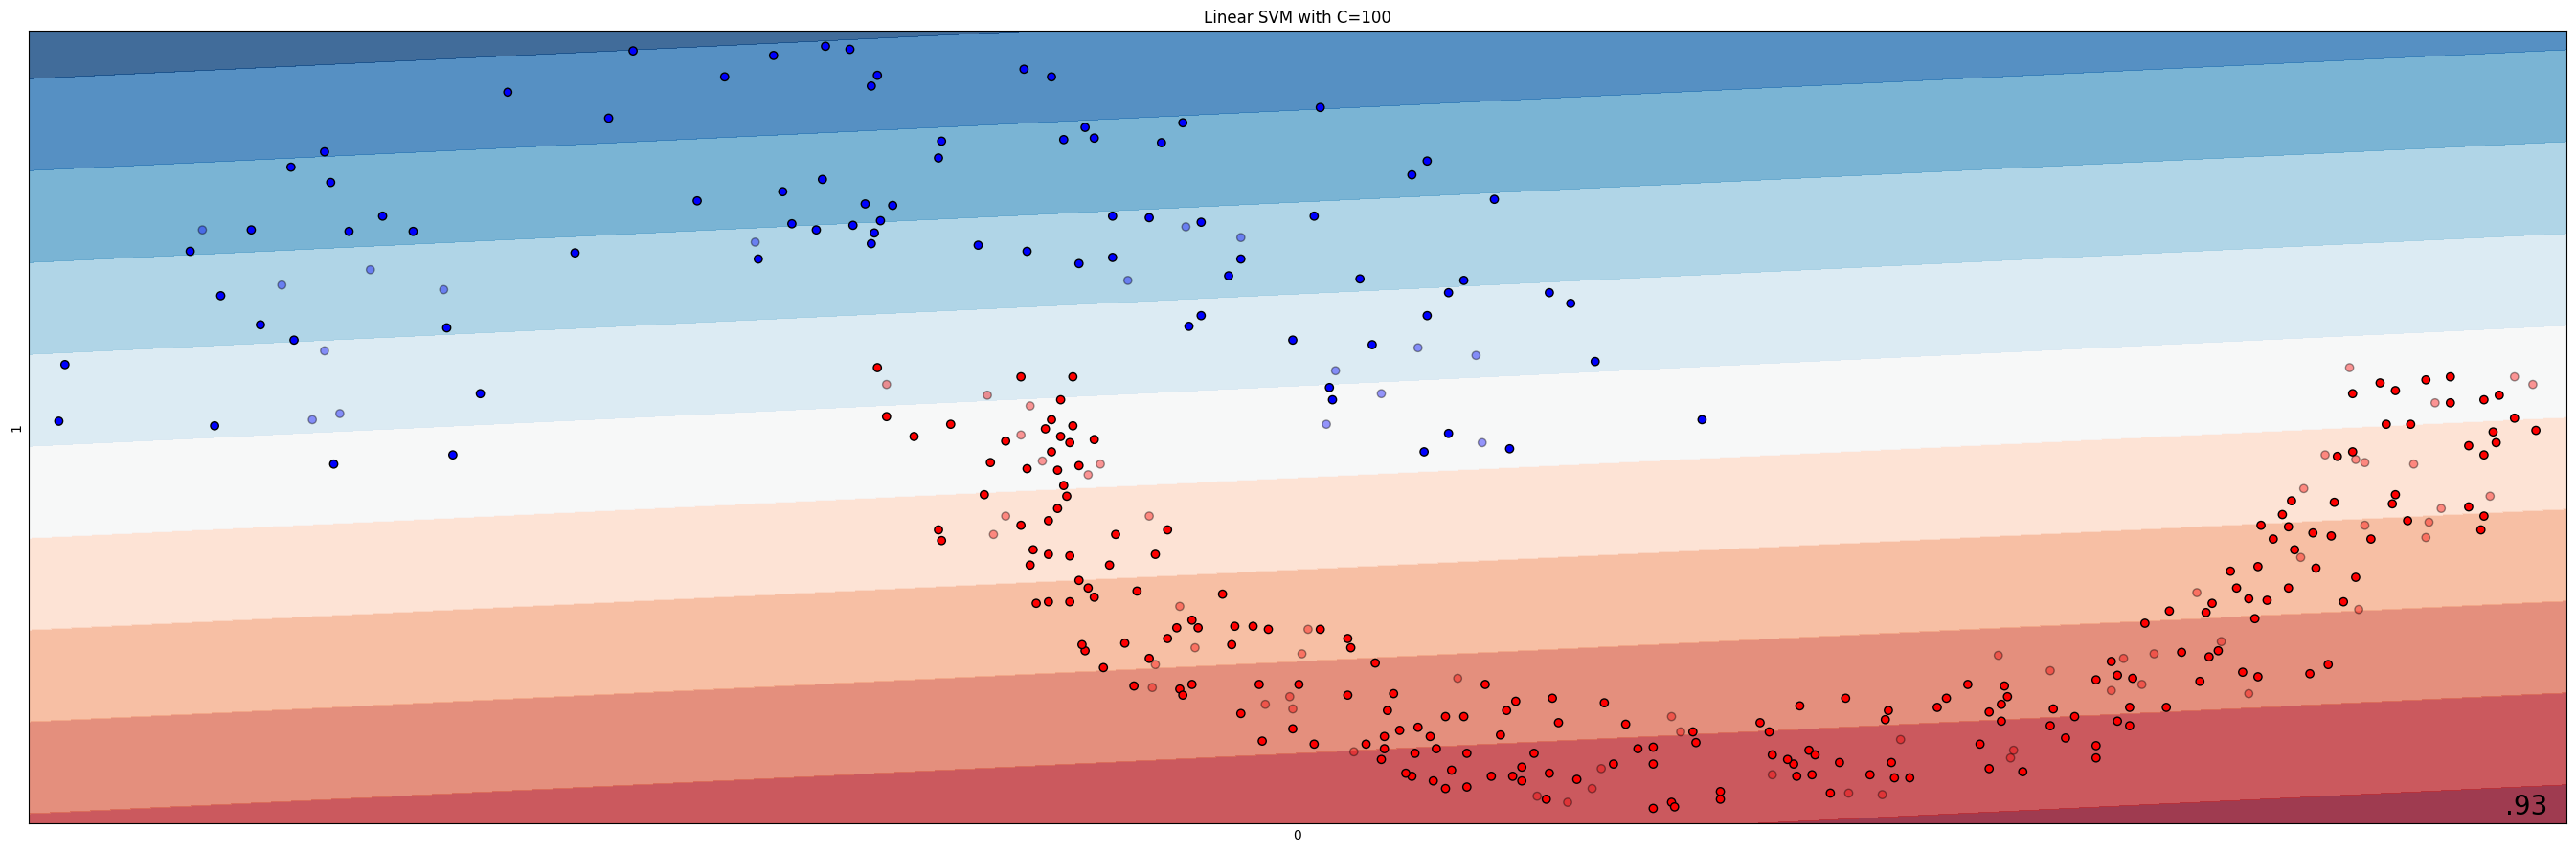

Indices of chosen support vectors for C=1000: [  6  25  60  77  92 100 131 136 150 167 168 174 185 241 262   7  12  23
  40  47  95 190 198 209 214 234 248 256 268]
Distance between class margins: 0.4338601726725737


<Figure size 2700x900 with 0 Axes>

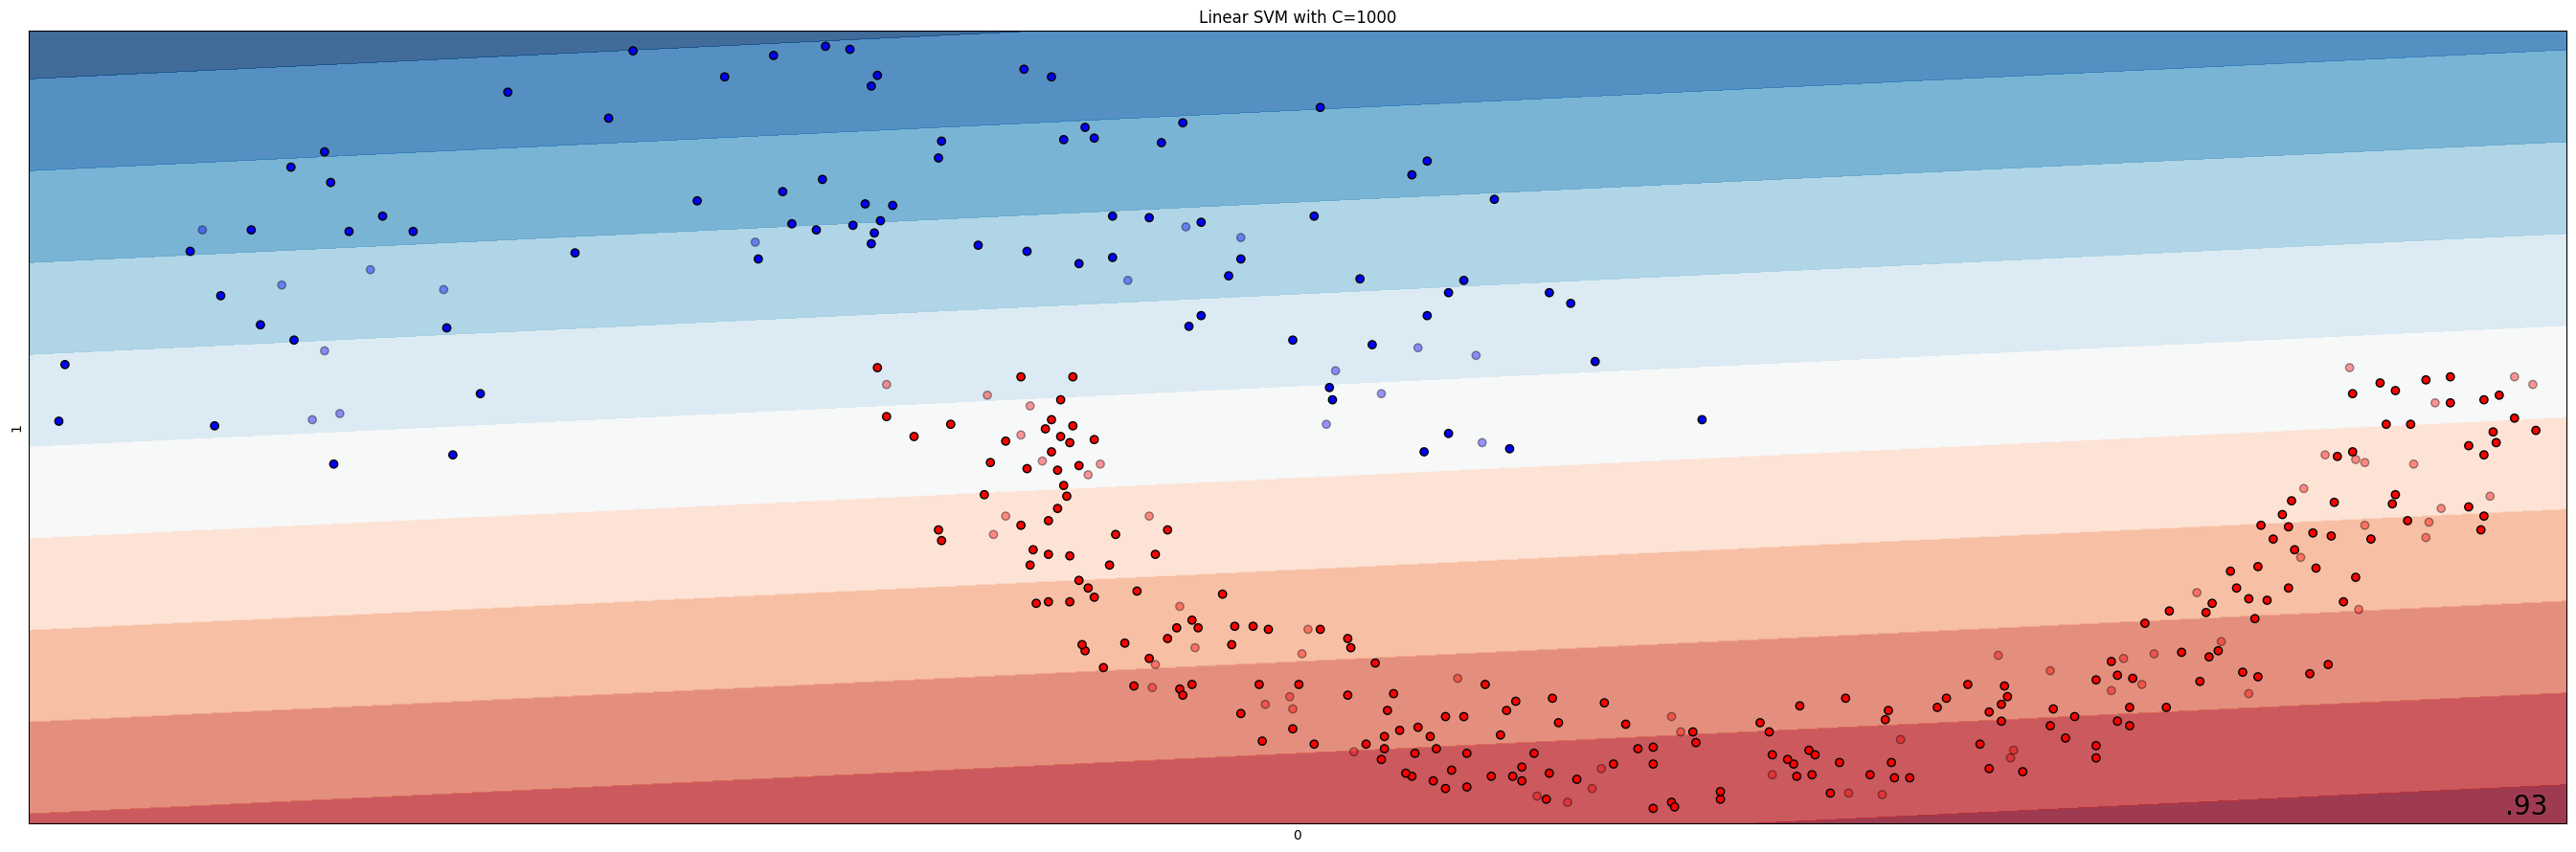

In [ ]:
C_values = [0.0001, 0.001, 0.01, 0.1, 0.7, 1, 4, 10, 100, 1000]

for c in C_values:
    clf = make_pipeline(StandardScaler(), SVC(kernel="linear", C=c, random_state=1))

    clf.fit(X_train, y_train)
    support_vectors = clf.get_params()['svc'].support_
    print(f'Indices of chosen support vectors for C={c}: {support_vectors}')

    score = clf.score(X_test, y_test)

    figure = plt.figure(figsize=(27, 9))

    print(f"Distance between class margins: {distance_between_class_borders(clf.get_params()['svc'])}")
    show_results(clf, score, f"Linear SVM with C={c}")

Wraz ze zwiększeniem parametru C, czyli zwiększaniem nacisku na to, by próbki podczas testowania były po poprawnej stronie (czyli stosowania wysokich kar za błędy) szerokość marginesu maleje. Na początku wraz ze zwiększaniem wartości C zwiększa się też poziom score, ale potem zaczyna maleć. Dlatego ważne jest, żeby odpowiednio dobrać ten parametr, bo gdy będzie za niski wtedy dopasowanie będzie słabe jakościowo, a gdy będzie za duży to może dojść do przeuczenia.

Indices of chosen support vectors for gamma=0.001: [  6  11  16  25  30  33  35  37  39  42  46  50  52  54  56  60  61  69
  75  76  77  79  81  83  86  87  92  94  96  99 100 109 118 119 126 129
 131 136 137 142 148 150 153 167 168 170 174 176 177 178 184 185 187 192
 193 195 204 211 212 219 220 221 225 228 232 233 235 237 241 242 250 259
 261 262 274 280 282 289 290 292   2   4   7  12  14  19  20  23  27  28
  29  40  41  47  48  53  55  57  59  63  64  67  78  84  88  95  98 104
 105 106 108 110 113 115 117 120 121 128 130 134 135 138 139 143 160 161
 165 180 189 190 196 198 201 203 205 207 209 214 215 223 226 234 245 247
 248 252 253 254 256 258 260 268 270 273 275 278 279 288 295 297]


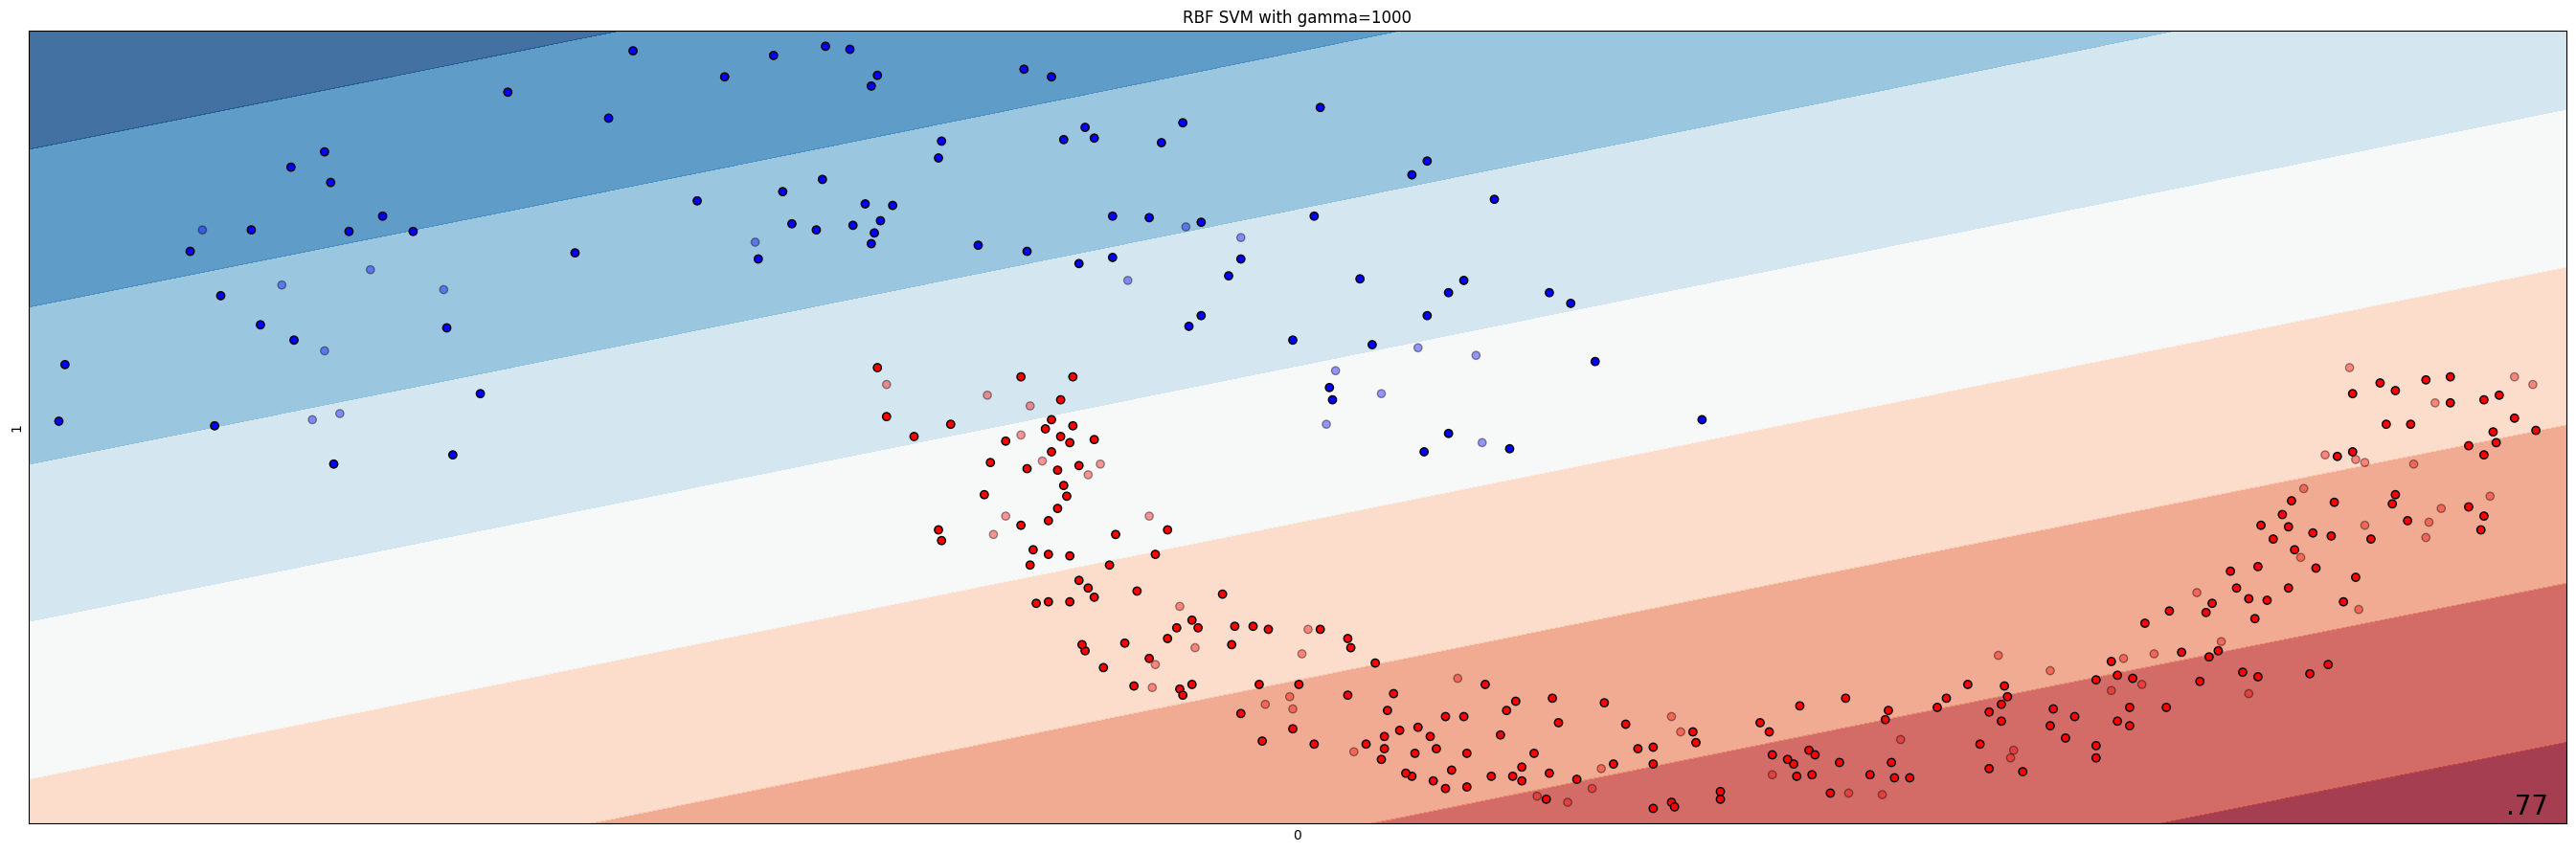

Indices of chosen support vectors for gamma=0.1: [  0   6  11  16  25  30  33  35  36  37  39  42  46  50  52  54  56  60
  61  66  69  75  77  79  81  83  86  87  92  96  99 100 109 118 119 125
 126 131 136 137 142 148 150 153 167 168 170 174 177 178 184 185 187 192
 193 195 204 211 212 220 221 225 228 232 233 235 237 241 242 250 259 261
 262 274 280 282 289 290 291 292   2   4   7  12  14  19  20  23  27  28
  29  40  41  47  48  53  55  57  59  63  64  67  78  84  88  95  98 104
 105 106 108 110 113 115 117 120 121 128 130 134 135 138 139 143 160 161
 165 180 189 190 196 198 201 203 205 207 209 214 215 223 226 234 245 247
 248 252 253 254 256 258 260 268 270 273 275 278 279 288 295 297]


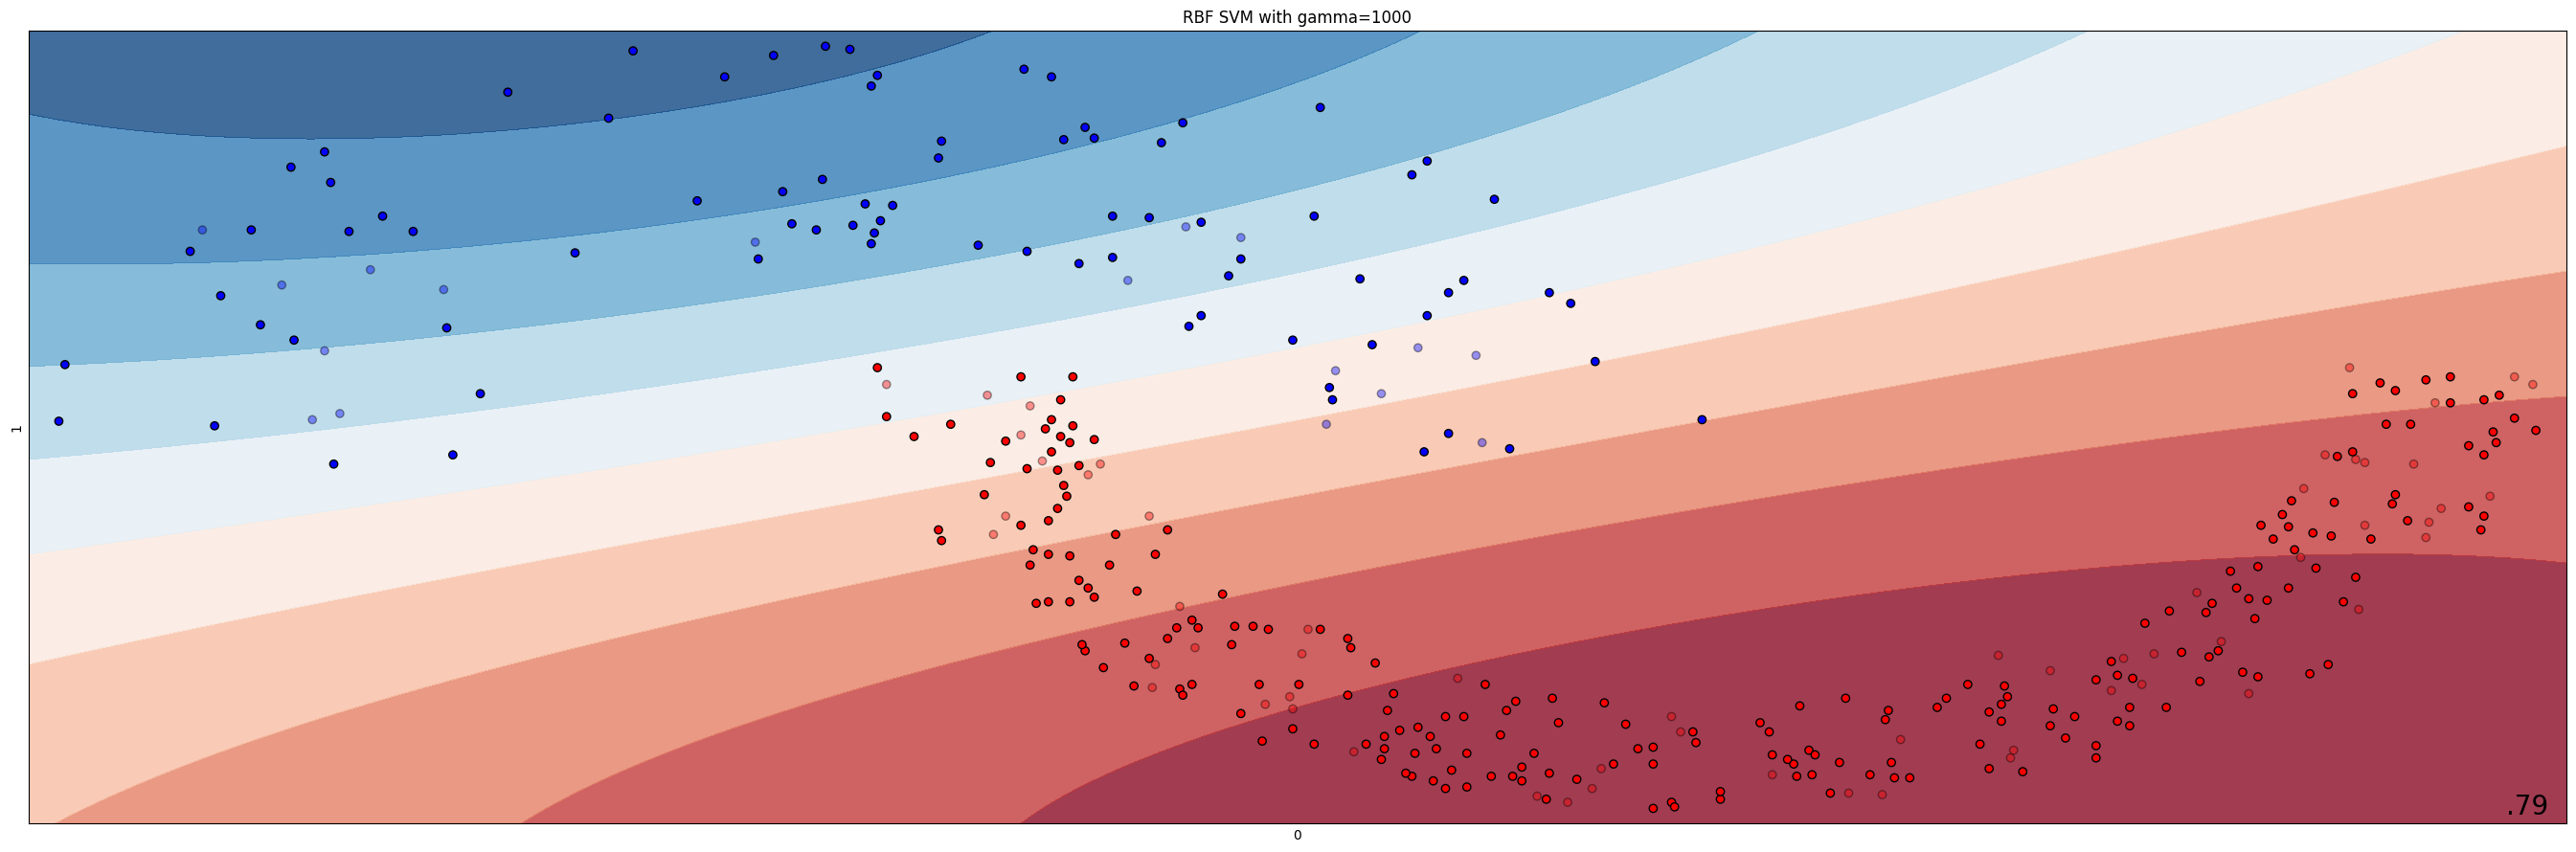

Indices of chosen support vectors for gamma=1: [  1   5   6  11  16  18  21  25  34  35  39  42  46  50  52  54  58  60
  77  79  80  82  87  89  92  96  97  99 100 103 109 111 119 124 125 126
 127 131 132 136 142 149 150 151 154 155 156 167 168 169 170 174 176 178
 181 185 187 192 199 200 202 204 211 221 225 227 231 233 236 237 241 242
 250 255 259 261 262 266 282 284 287 289 291 296   2   4   7  12  14  19
  20  23  27  28  29  40  41  47  48  53  55  57  59  63  64  67  78  84
  88  95  98 104 105 106 108 110 113 115 117 120 121 128 130 134 135 138
 139 143 160 161 165 180 189 190 196 198 201 203 205 207 209 214 215 223
 226 234 245 247 248 252 253 254 256 258 260 268 270 273 275 278 279 288
 295 297]


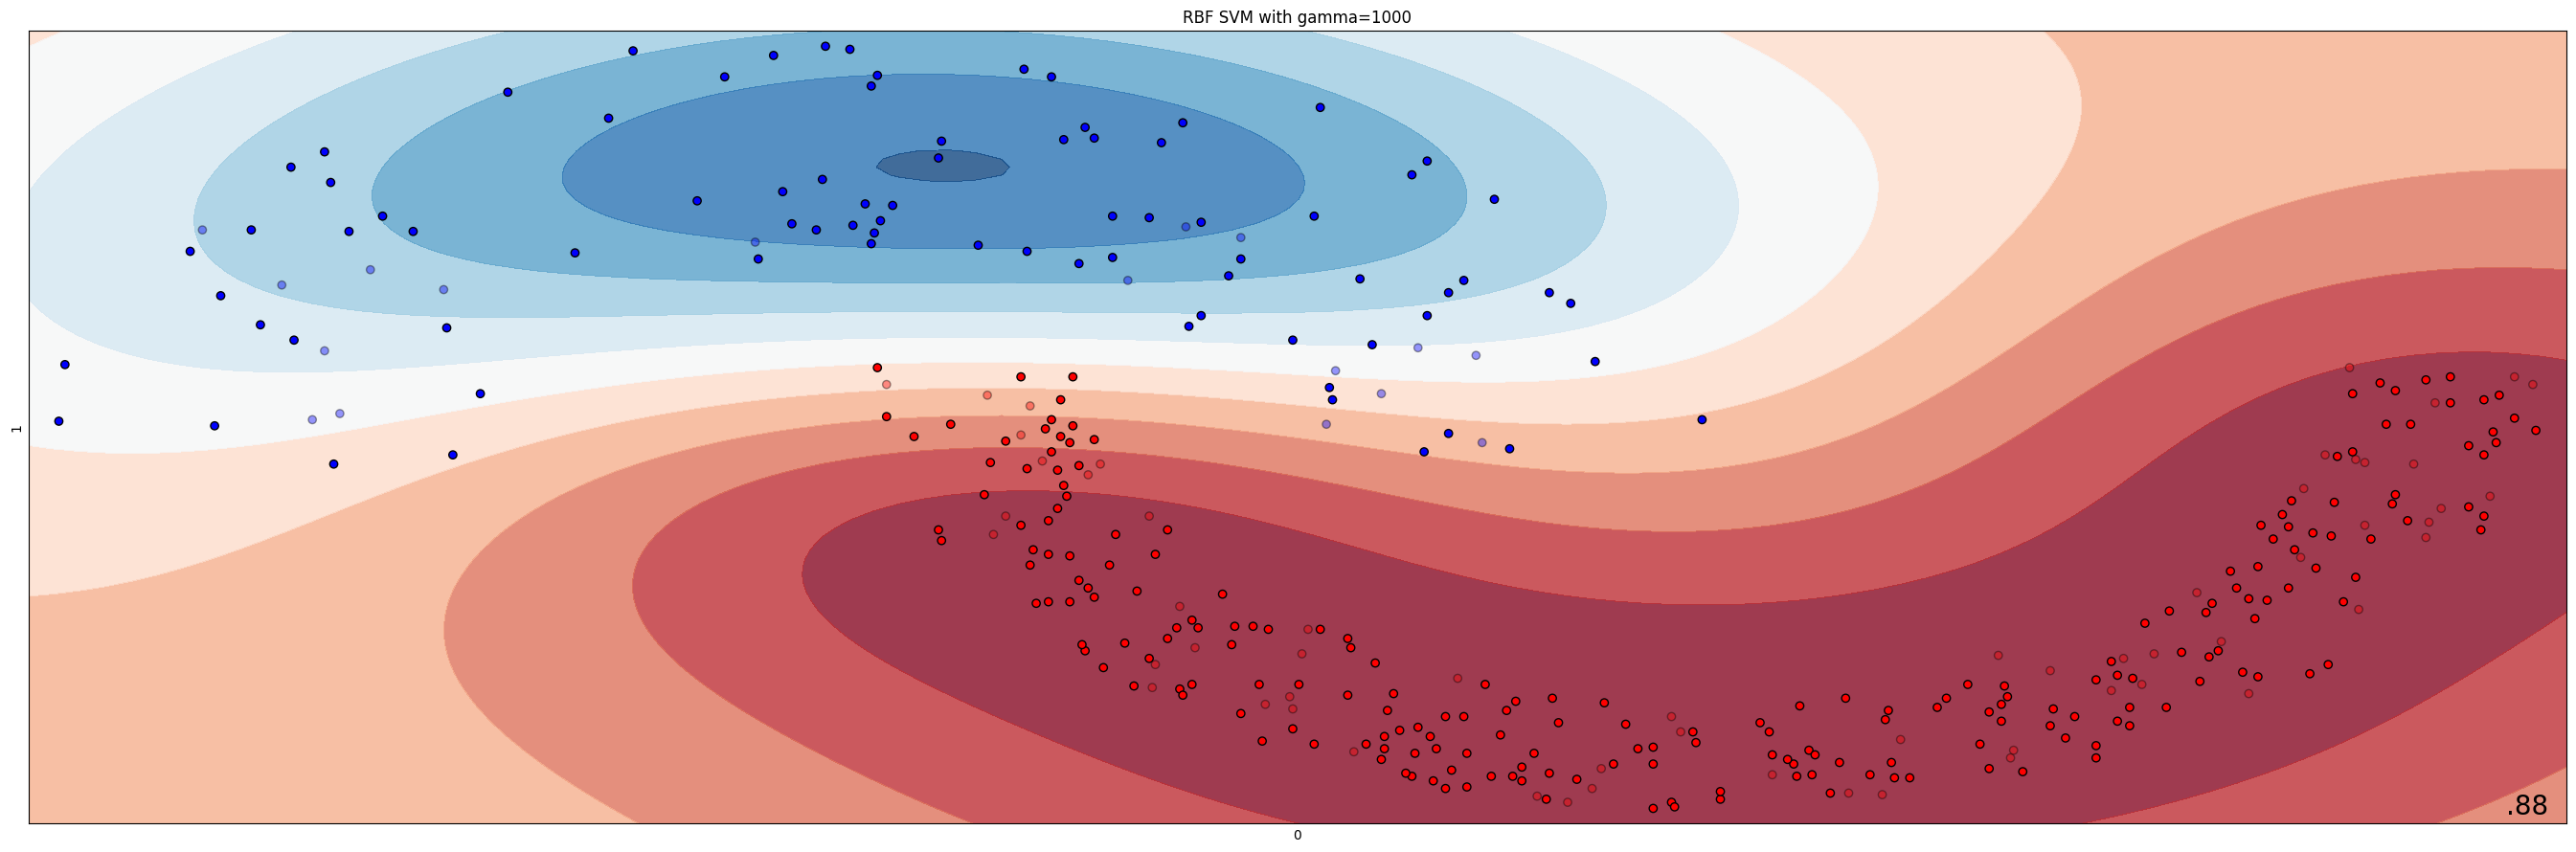

Indices of chosen support vectors for gamma=1.5: [  5   6  11  16  18  21  24  25  30  35  39  42  46  50  52  54  58  60
  77  79  80  82  87  89  92  93  94  97  99 100 109 111 116 124 125 126
 127 131 132 136 149 150 151 154 155 156 167 168 169 174 176 178 181 184
 185 195 199 200 204 211 213 218 219 220 225 227 229 231 233 236 237 241
 242 250 251 255 259 261 262 266 282 284 287 296   2   4   7  12  14  19
  20  23  27  28  29  40  41  47  48  53  55  57  59  63  64  67  78  84
  88  95  98 104 105 106 108 110 113 115 117 120 121 128 130 134 135 138
 139 143 160 161 165 180 189 190 196 198 201 203 205 207 209 214 215 223
 226 234 245 247 248 252 253 254 256 258 260 268 270 273 275 278 279 288
 295 297]


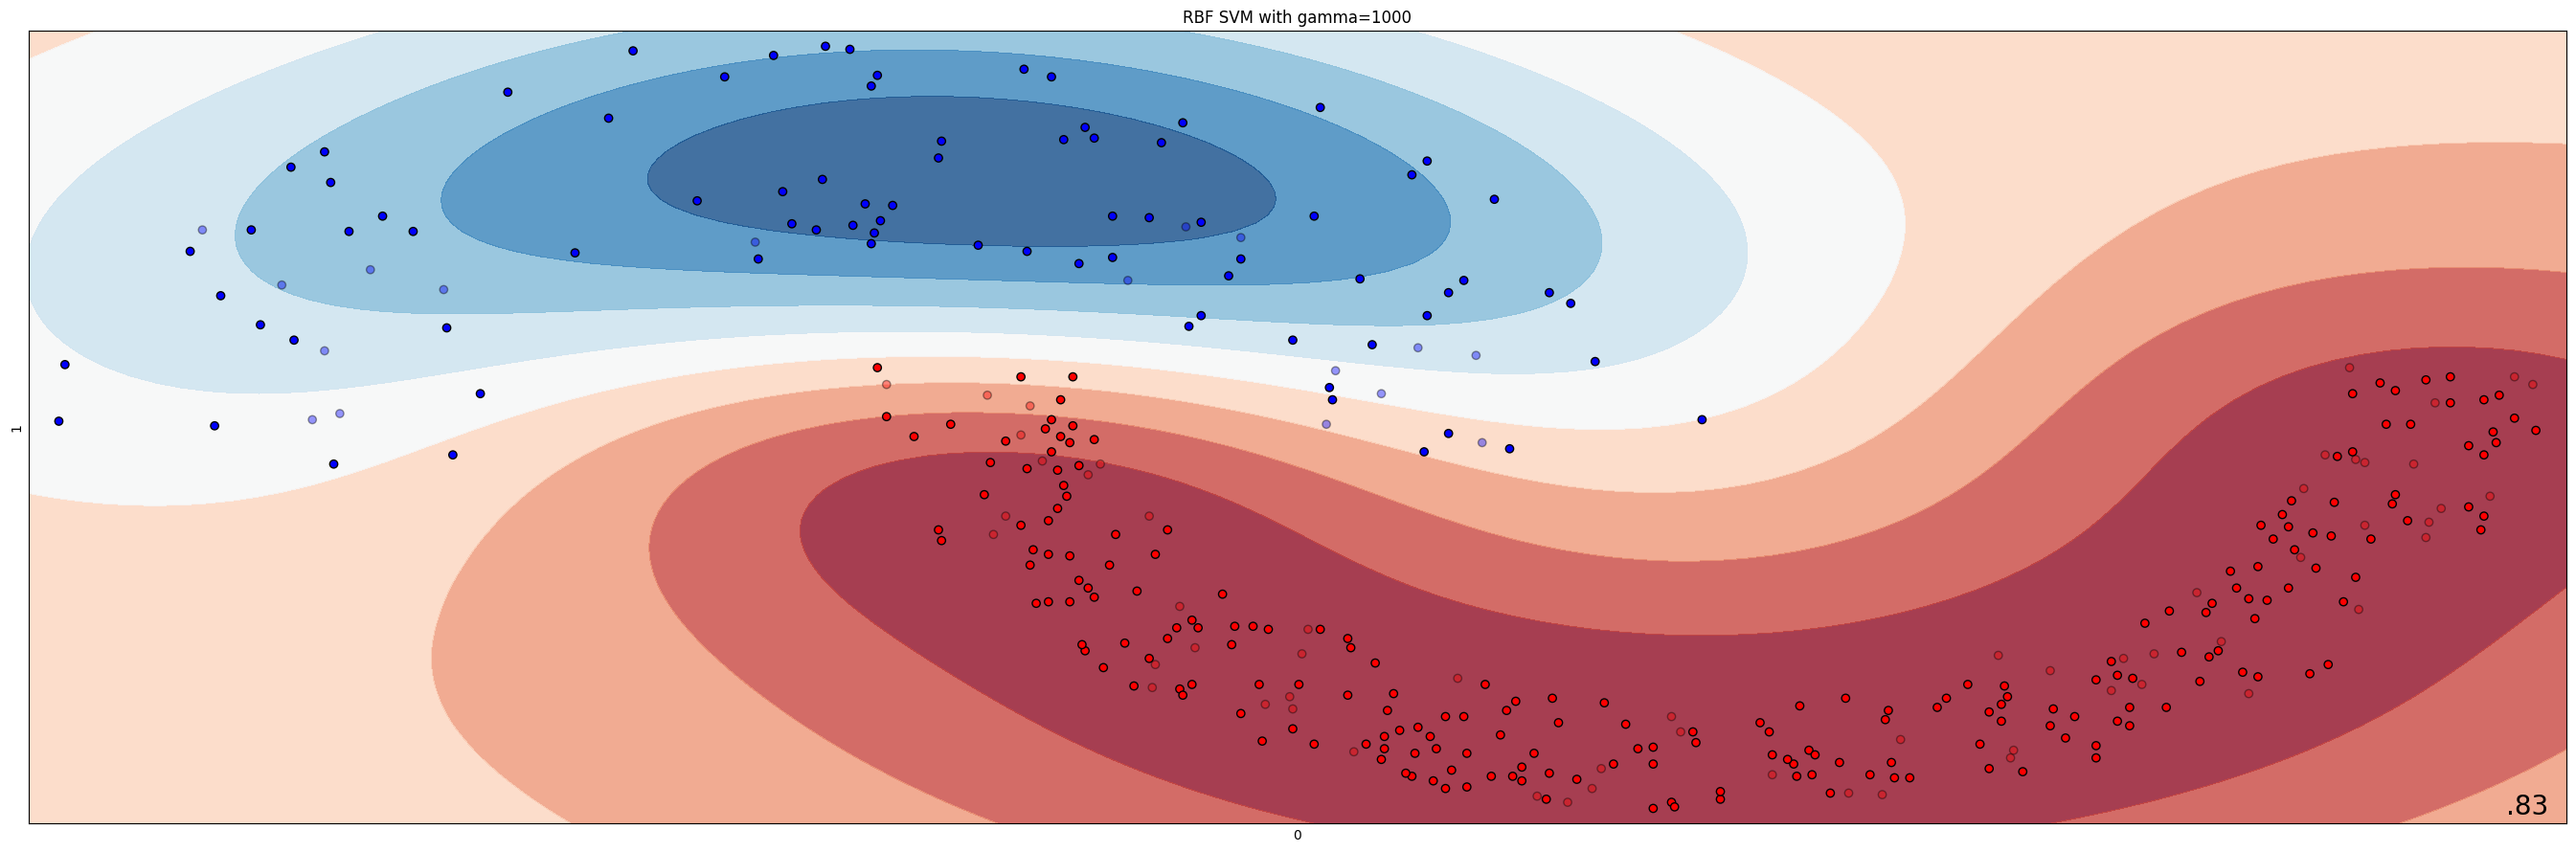

Indices of chosen support vectors for gamma=2: [  5   6  11  18  21  24  25  30  32  35  39  42  46  50  52  54  58  60
  74  77  80  82  87  89  92  93  94  97  99 100 109 111 116 124 127 131
 132 136 149 150 151 154 155 156 167 168 169 174 176 178 184 185 193 195
 199 200 204 211 212 213 218 219 220 222 225 227 230 231 233 236 241 242
 250 251 255 259 261 262 263 266 282 284 287 296   2   4   7  12  14  19
  20  23  27  28  29  40  41  47  48  53  55  57  59  63  64  67  78  84
  88  95  98 104 105 106 108 110 113 115 117 120 121 128 130 134 135 138
 139 143 160 161 165 180 189 190 196 198 201 203 205 207 209 214 215 223
 226 234 245 247 248 252 253 254 256 258 260 268 270 273 275 278 279 288
 295 297]


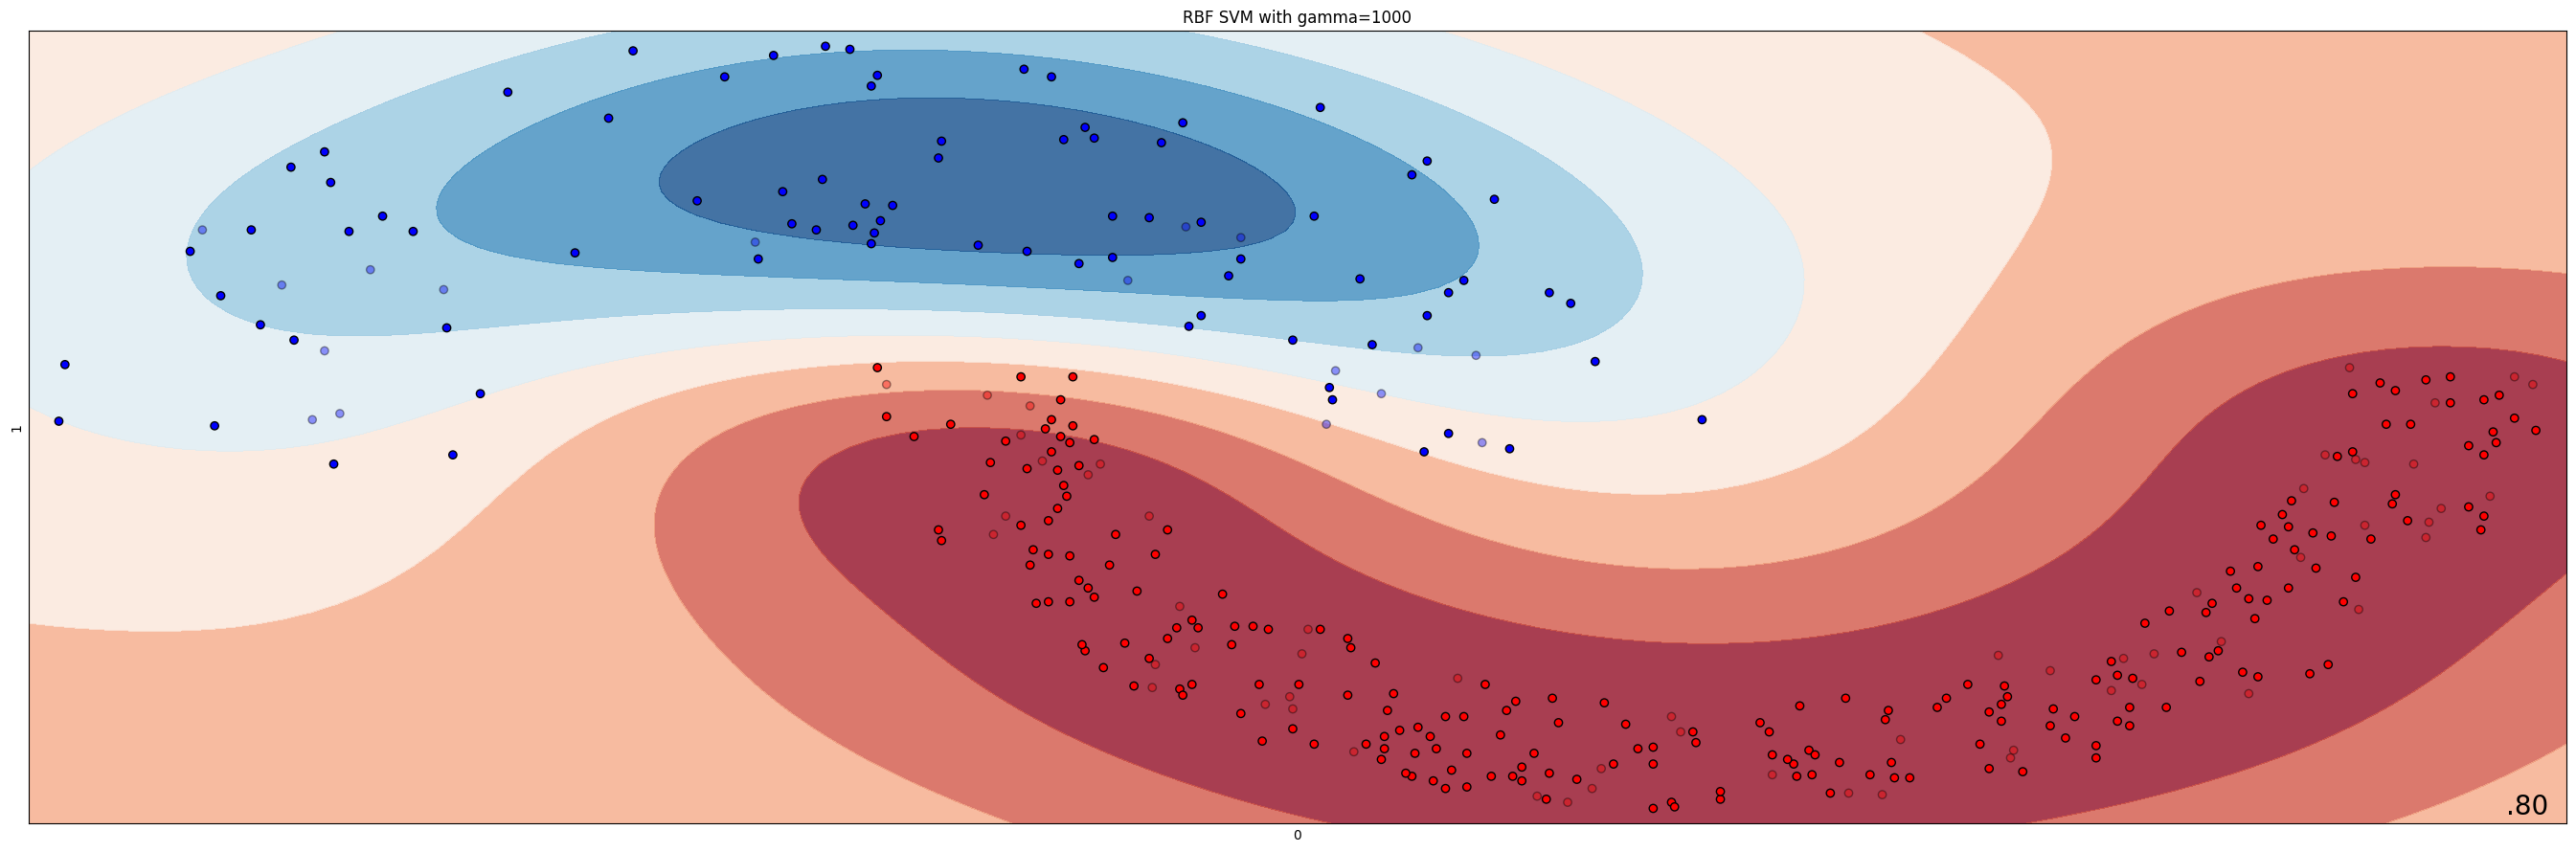

Indices of chosen support vectors for gamma=5: [  1   5   6  11  18  21  22  24  25  30  32  42  52  54  58  60  74  75
  77  82  87  89  93  97  99 100 109 111 116 124 127 131 132 136 142 146
 149 150 151 152 154 155 156 167 168 169 174 176 178 181 184 185 187 192
 193 194 195 197 199 200 211 212 213 218 219 220 221 222 225 227 229 230
 231 233 236 239 241 242 251 255 262 263 266 282 284 287 291 292 293 296
   2   4   7  12  14  19  20  23  27  28  29  40  41  47  48  53  55  57
  59  63  64  67  78  84  88  95  98 104 105 106 108 110 113 115 117 120
 121 128 130 134 135 138 139 143 160 161 165 180 189 190 196 198 201 203
 205 207 209 214 215 223 226 234 245 247 248 252 253 254 256 258 260 268
 270 273 275 278 279 288 295 297]


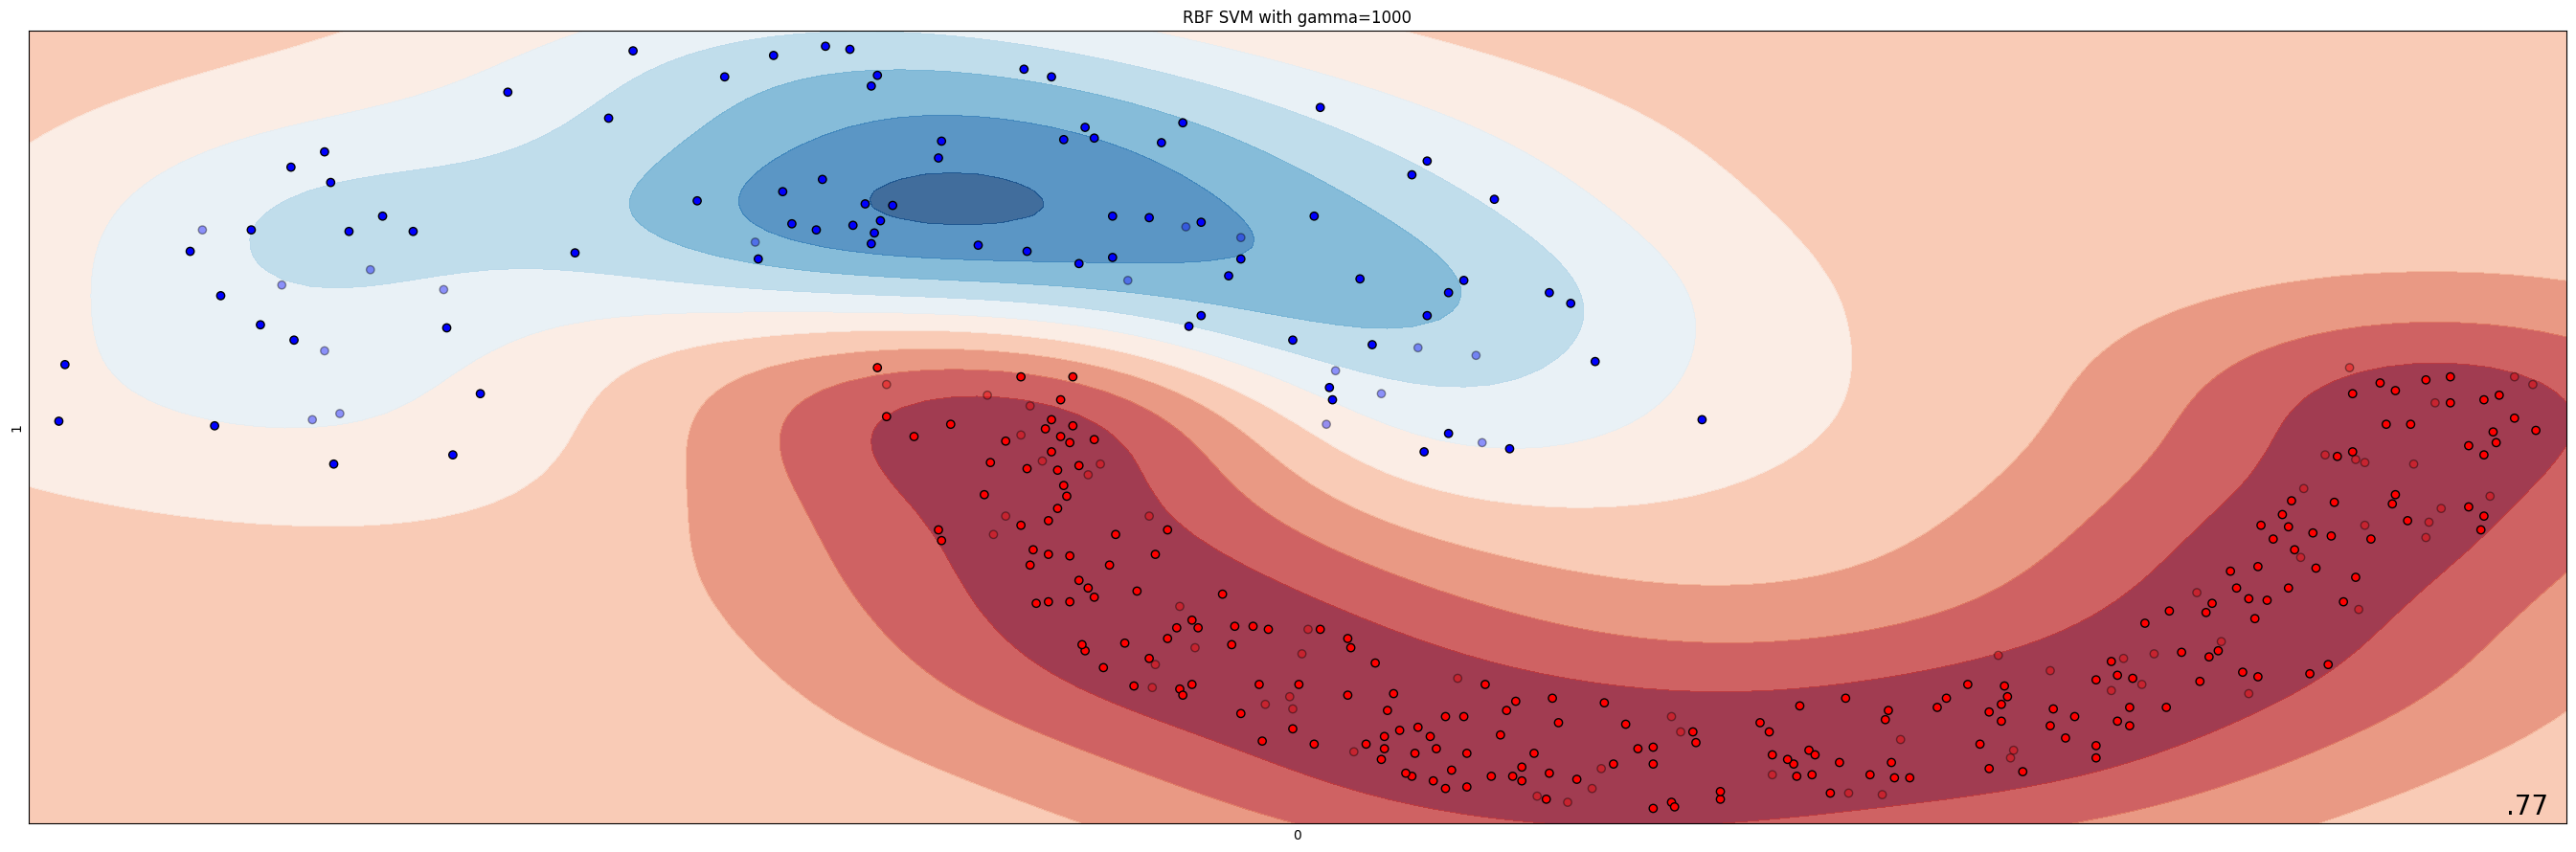

Indices of chosen support vectors for gamma=10: [  1   5  11  18  21  22  24  25  30  32  38  42  50  52  54  58  60  66
  74  75  77  79  80  82  87  89  93  97 100 111 116 124 127 132 136 142
 146 149 151 152 154 155 156 162 167 169 170 174 176 178 181 184 185 192
 193 194 195 197 199 200 211 212 213 218 219 220 221 222 225 227 229 230
 231 233 236 237 239 241 242 251 255 262 263 266 271 282 284 285 287 291
 292 293 296   2   4   7  12  14  19  20  23  27  28  29  40  41  47  48
  53  55  57  59  63  64  67  78  84  88  95  98 104 105 106 108 110 113
 115 117 120 121 128 130 134 135 138 139 143 160 161 165 180 189 190 196
 198 201 203 205 207 209 214 215 223 226 234 245 247 248 252 253 254 256
 258 260 268 270 273 275 278 279 288 295 297]


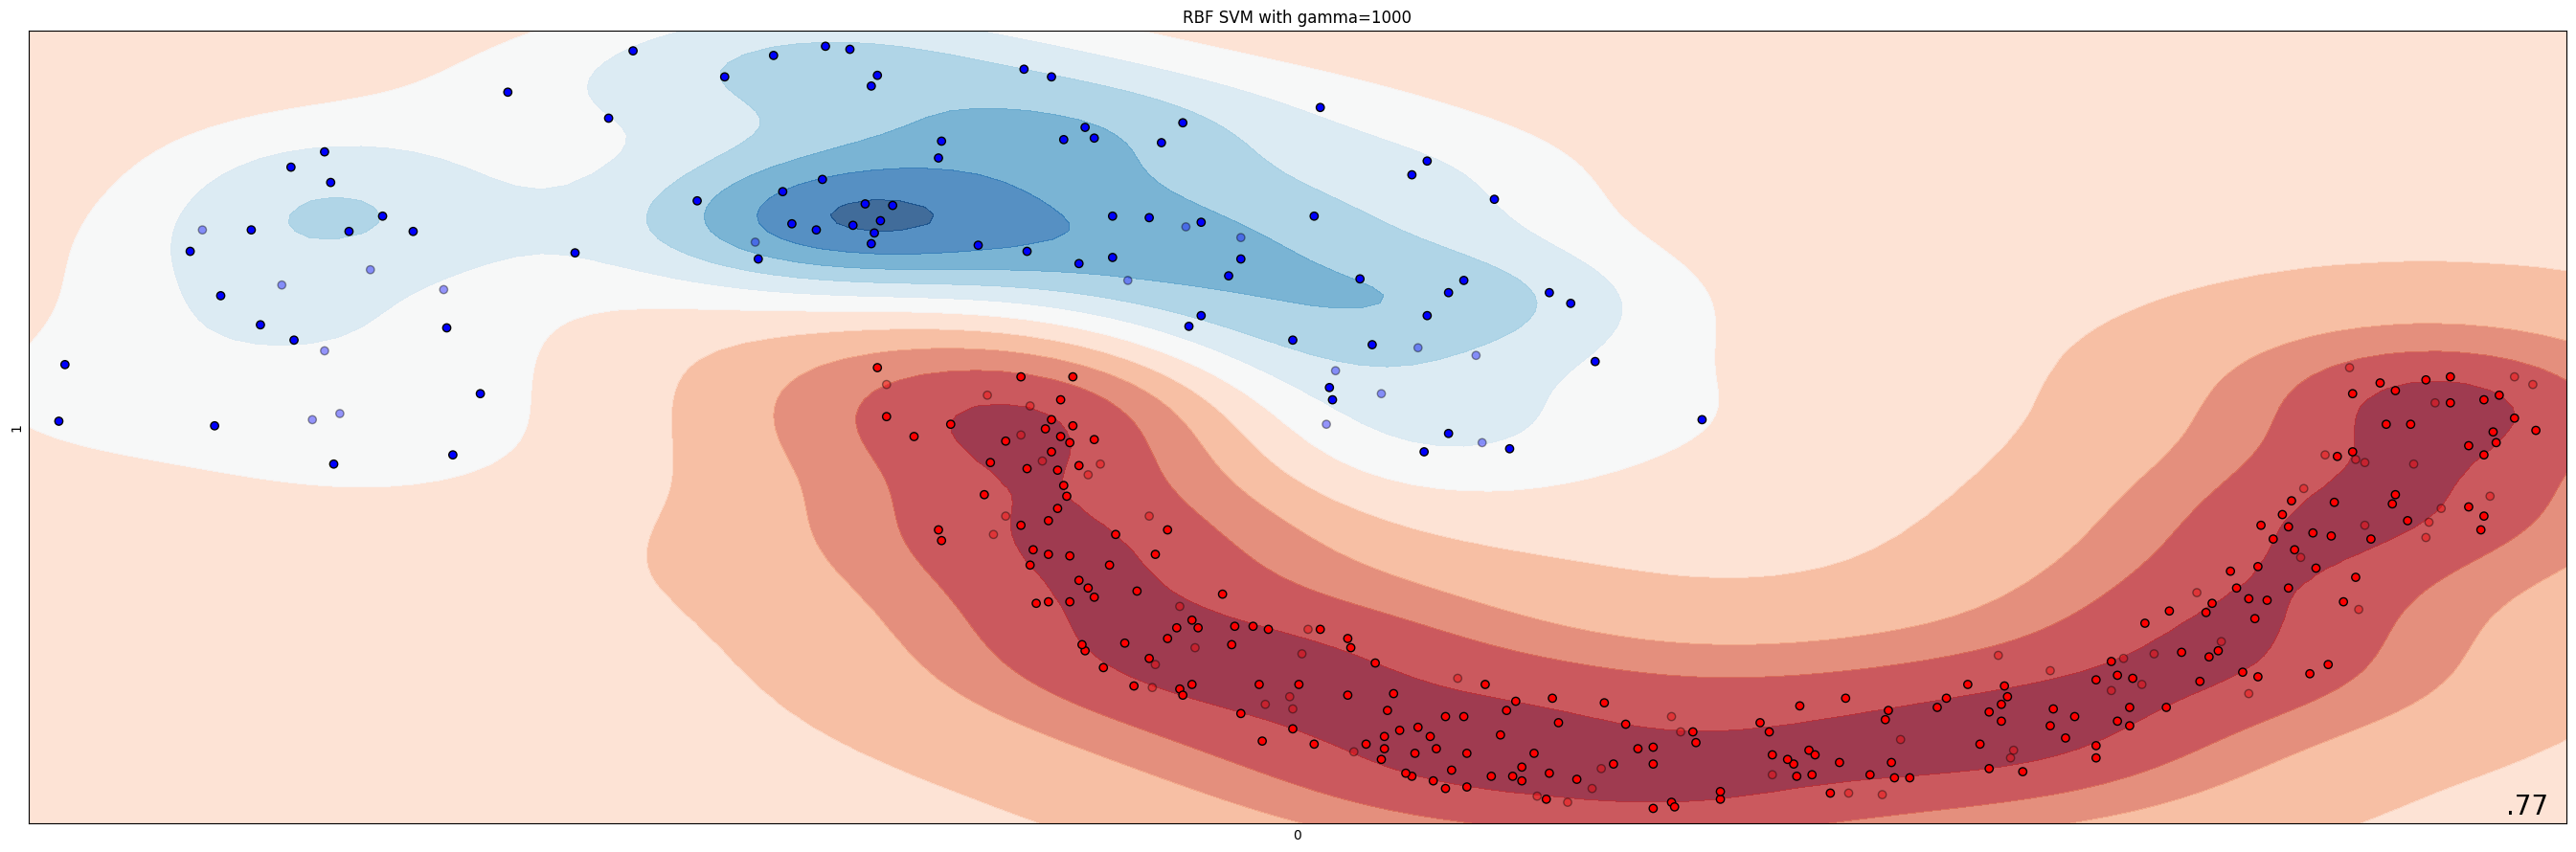

Indices of chosen support vectors for gamma=100: [  0   1   3   5   8   9  11  13  16  17  18  21  24  25  30  32  33  34
  36  38  45  49  50  52  54  56  58  60  62  65  66  71  72  74  76  77
  79  82  83  85  86  87  89  92  93  96  97 100 101 103 107 111 114 116
 118 122 123 124 126 129 131 132 133 136 137 140 141 142 144 145 146 147
 148 149 151 152 153 154 157 158 159 162 163 166 167 170 171 172 173 174
 175 176 177 178 179 181 184 185 186 187 191 192 193 194 197 200 204 208
 211 212 216 219 220 221 222 224 225 228 229 230 231 232 233 235 236 237
 238 239 240 241 242 249 250 251 259 262 263 264 265 266 267 269 271 272
 274 276 277 282 283 284 285 286 287 289 291 292 293 296   2   4   7  12
  14  19  20  23  27  28  29  40  41  47  48  53  55  57  59  63  64  67
  78  84  88  95  98 104 105 106 108 110 113 115 117 120 121 128 130 134
 135 138 139 143 160 161 165 180 189 190 196 198 201 203 205 207 209 214
 215 223 226 234 245 247 248 252 253 254 256 258 260 268 270 273 275 278
 2

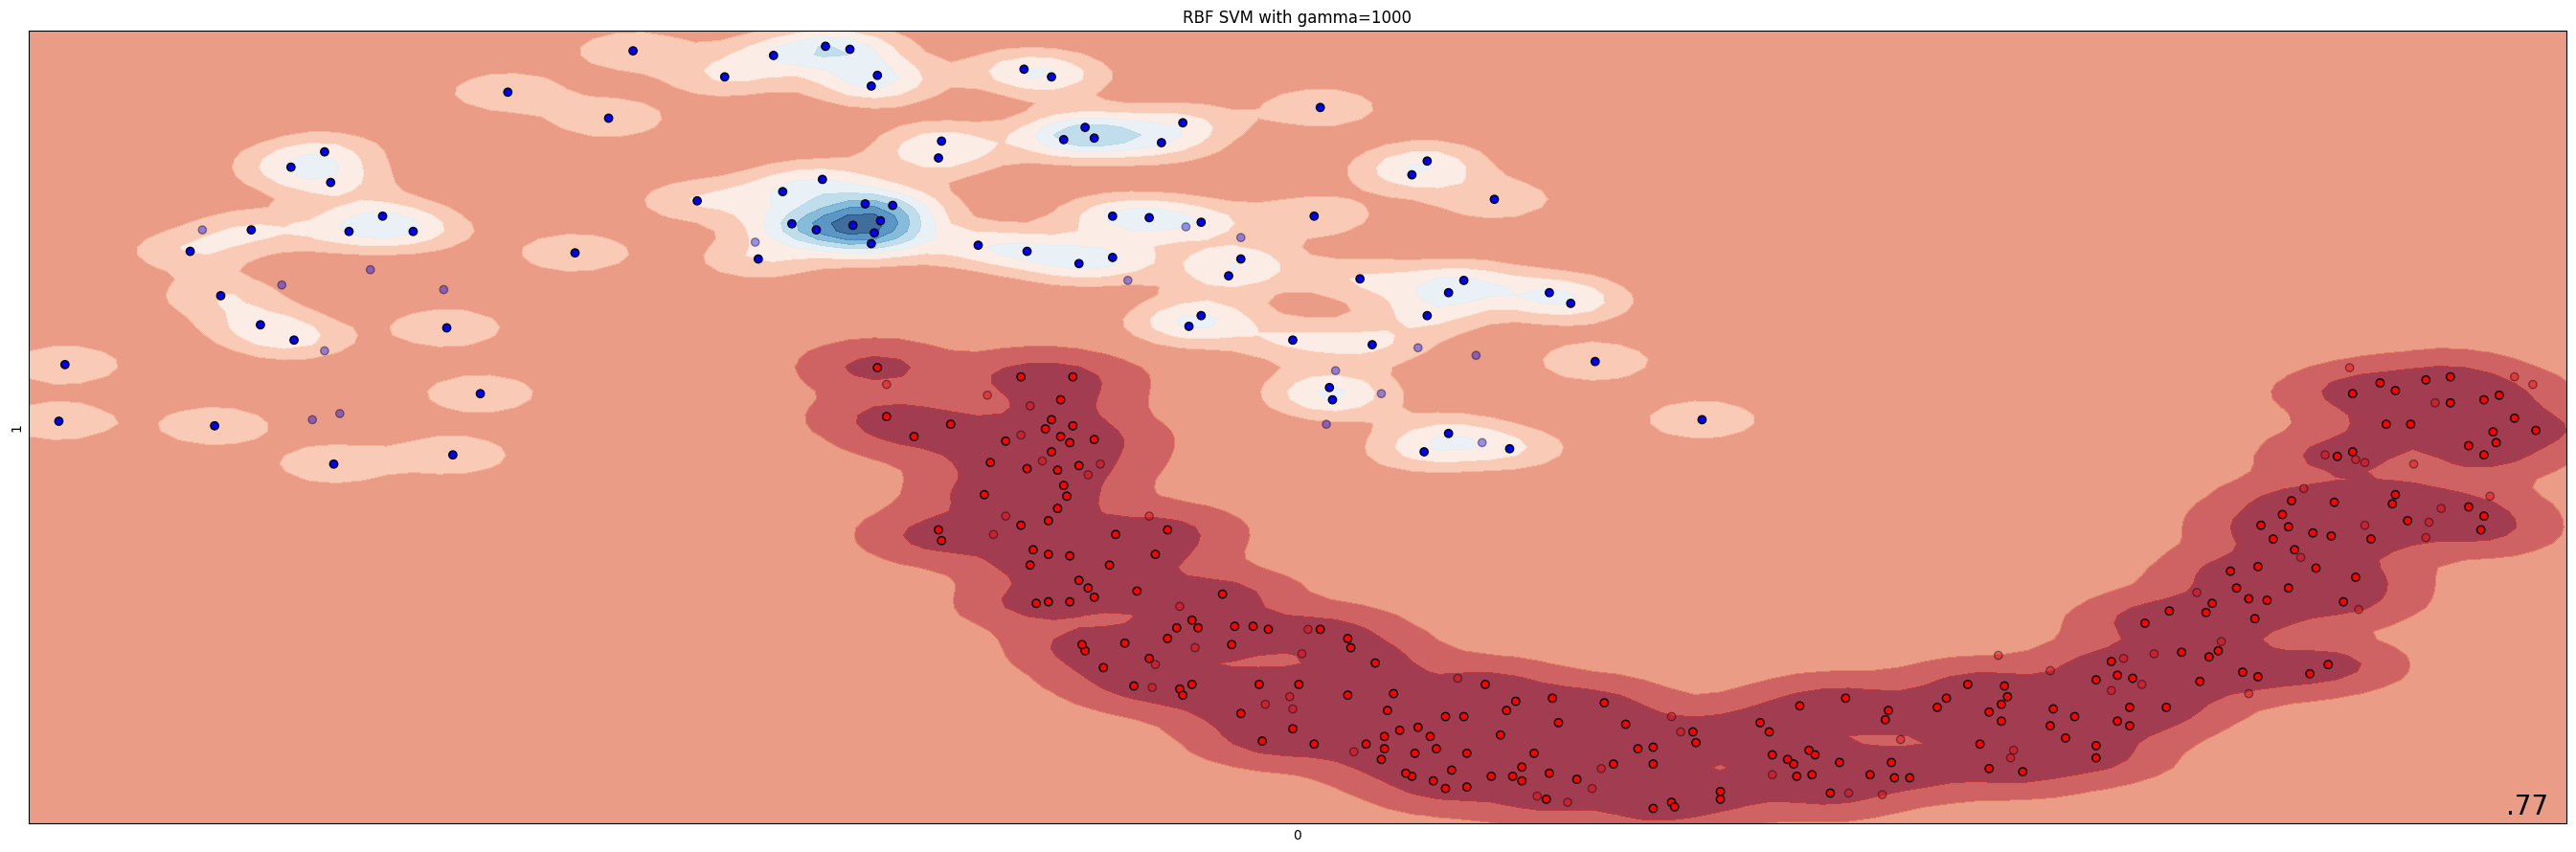

In [ ]:
gamma_values = [0.001, 0.1, 1, 1.5, 2, 5, 10, 100]

for g in gamma_values:
    clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=0.025, gamma=g, random_state=1))

    clf.fit(X_train, y_train)
    support_vectors = clf.get_params()['svc'].support_
    print(f'Indices of chosen support vectors for gamma={g}: {support_vectors}')

    score = clf.score(X_test, y_test)

    figure = plt.figure(figsize=(27, 9))

    show_results(clf, score, f"RBF SVM with gamma={c}")

Analogicznie do parametru C w przypadku liniowego SVM, tak samo zachowuje czynnik sigma w kernelu gaussowskim typu RBF. Wraz z jego zwiększaniem funkcja lepiej uczy się danych i do nich dopasowuje, ale jeśli będzie za duży to dojdzie do przeuczenia.